# Taller Crimes Boston

### **Anderson Alvarado & Daniel Felipe Rios**

# Librerias

In [1]:
%pip install pandas matplotlib seaborn numpy folium scikit-learn tensorflow nbformat

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from calendar import month_name
import numpy as np
import folium
from folium.plugins import HeatMap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.multiclass import OneVsRestClassifier
import time
import warnings
warnings.filterwarnings('ignore')

2025-05-08 21:09:03.044215: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-08 21:09:03.044649: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 21:09:03.046538: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 21:09:03.051356: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746756543.059166  103786 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746756543.06

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

In [4]:
%run "0_Funciones/0_funciones.ipynb"

## Cargar Datos

In [5]:
# carga el dataset Data/crime.csv
df_crime = pd.read_csv('Data/crime.csv', encoding='latin1')
df_crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


## Descripción Dataset

In [6]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [7]:
analizar_dataframe(df_crime)

Número de filas y columnas: (319073, 17)

Número de nulos por columnas: 
INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

Número total de nulos: 370778 

% de nulos de cada columna: 
INCIDENT_NUMBER         0.000000
OFFENSE_CODE            0.000000
OFFENSE_CODE_GROUP      0.000000
OFFENSE_DESCRIPTION     0.000000
DISTRICT                0.553165
REPORTING_AREA          0.000000
SHOOTING               99.680637
OCCURRED_ON_DATE        0.000000
YEAR                    0.000000
MONTH                   0.000000
DAY_OF_WEEK 

## Análisis del Dataset

In [8]:
# descripción de los datos
df_crime.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
INCIDENT_NUMBER,319073,282517,I162030584,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OFFENSE_CODE,319073.0,NaN,NaN,NaN,2317.546956,1185.285543,111.0,1001.0,2907.0,3201.0,3831.0
OFFENSE_CODE_GROUP,319073,67,Motor Vehicle Accident Response,37132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OFFENSE_DESCRIPTION,319073,244,SICK/INJURED/MEDICAL - PERSON,18783,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DISTRICT,317308,12,B2,49945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REPORTING_AREA,319073,879,,20250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHOOTING,1019,1,Y,1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OCCURRED_ON_DATE,319073,233229,2017-06-01 00:00:00,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR,319073.0,NaN,NaN,NaN,2016.560586,0.996344,2015.0,2016.0,2017.0,2017.0,2018.0
MONTH,319073.0,NaN,NaN,NaN,6.609719,3.273691,1.0,4.0,7.0,9.0,12.0


### Distribución de los datos

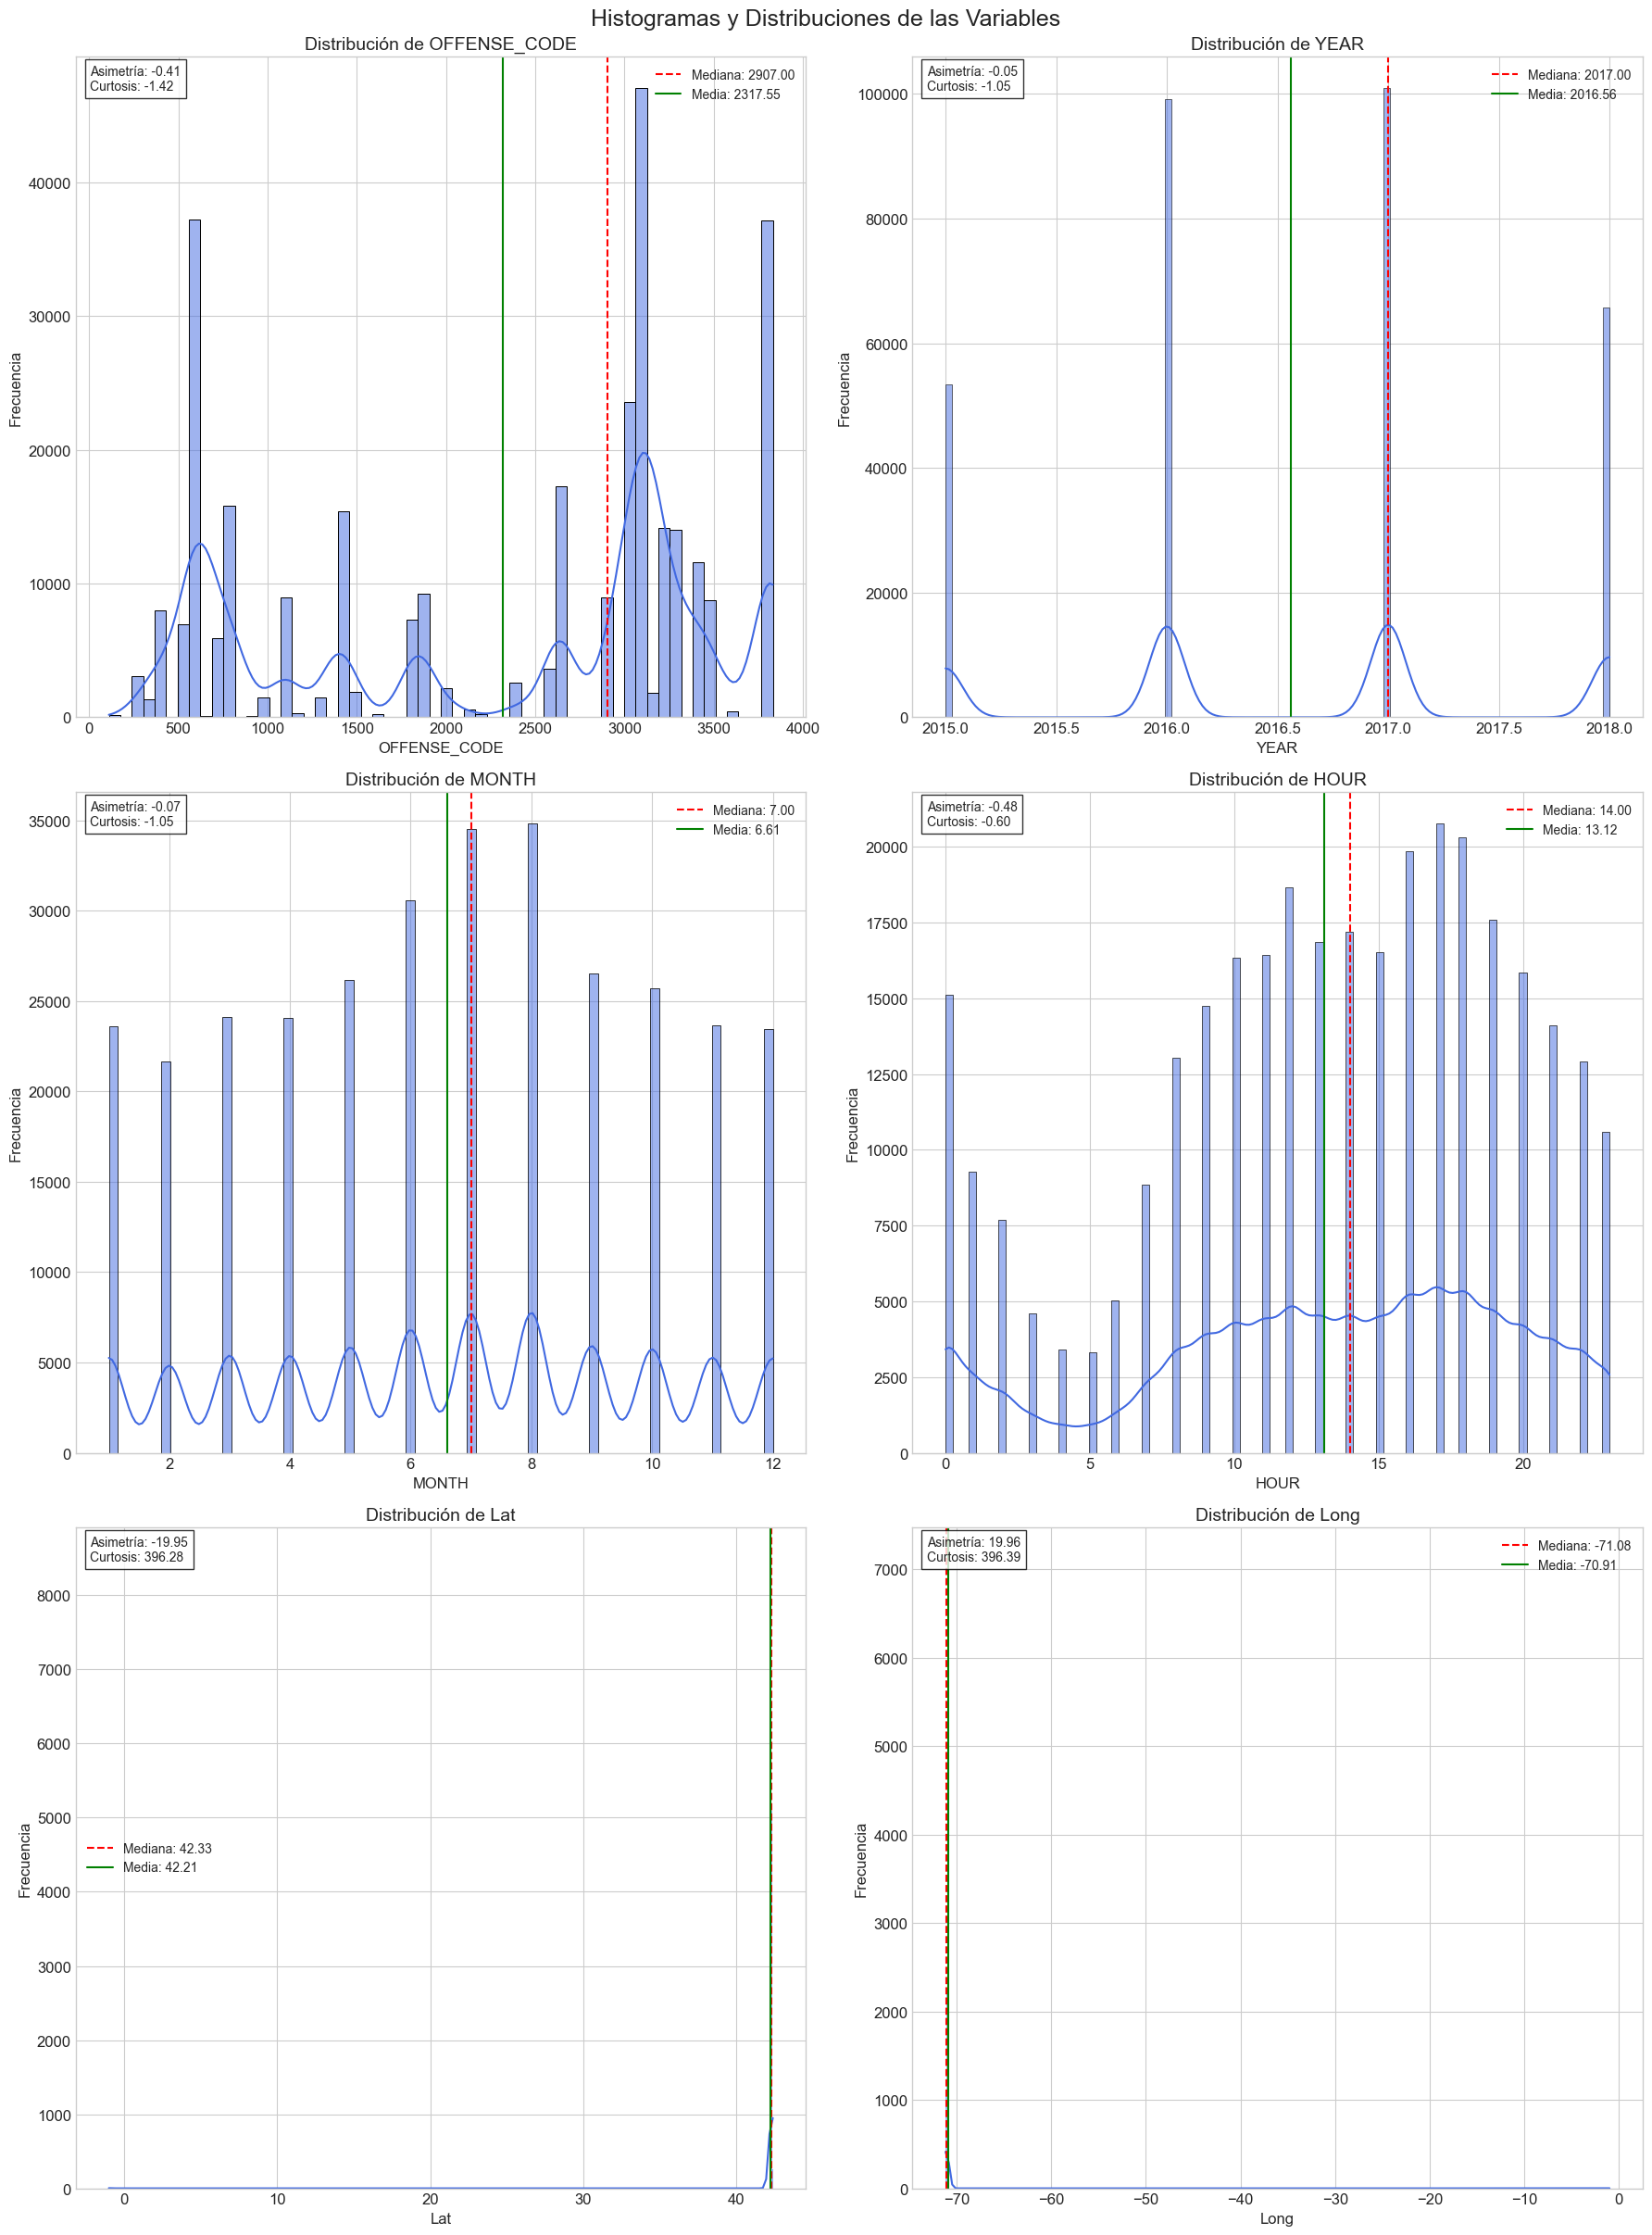

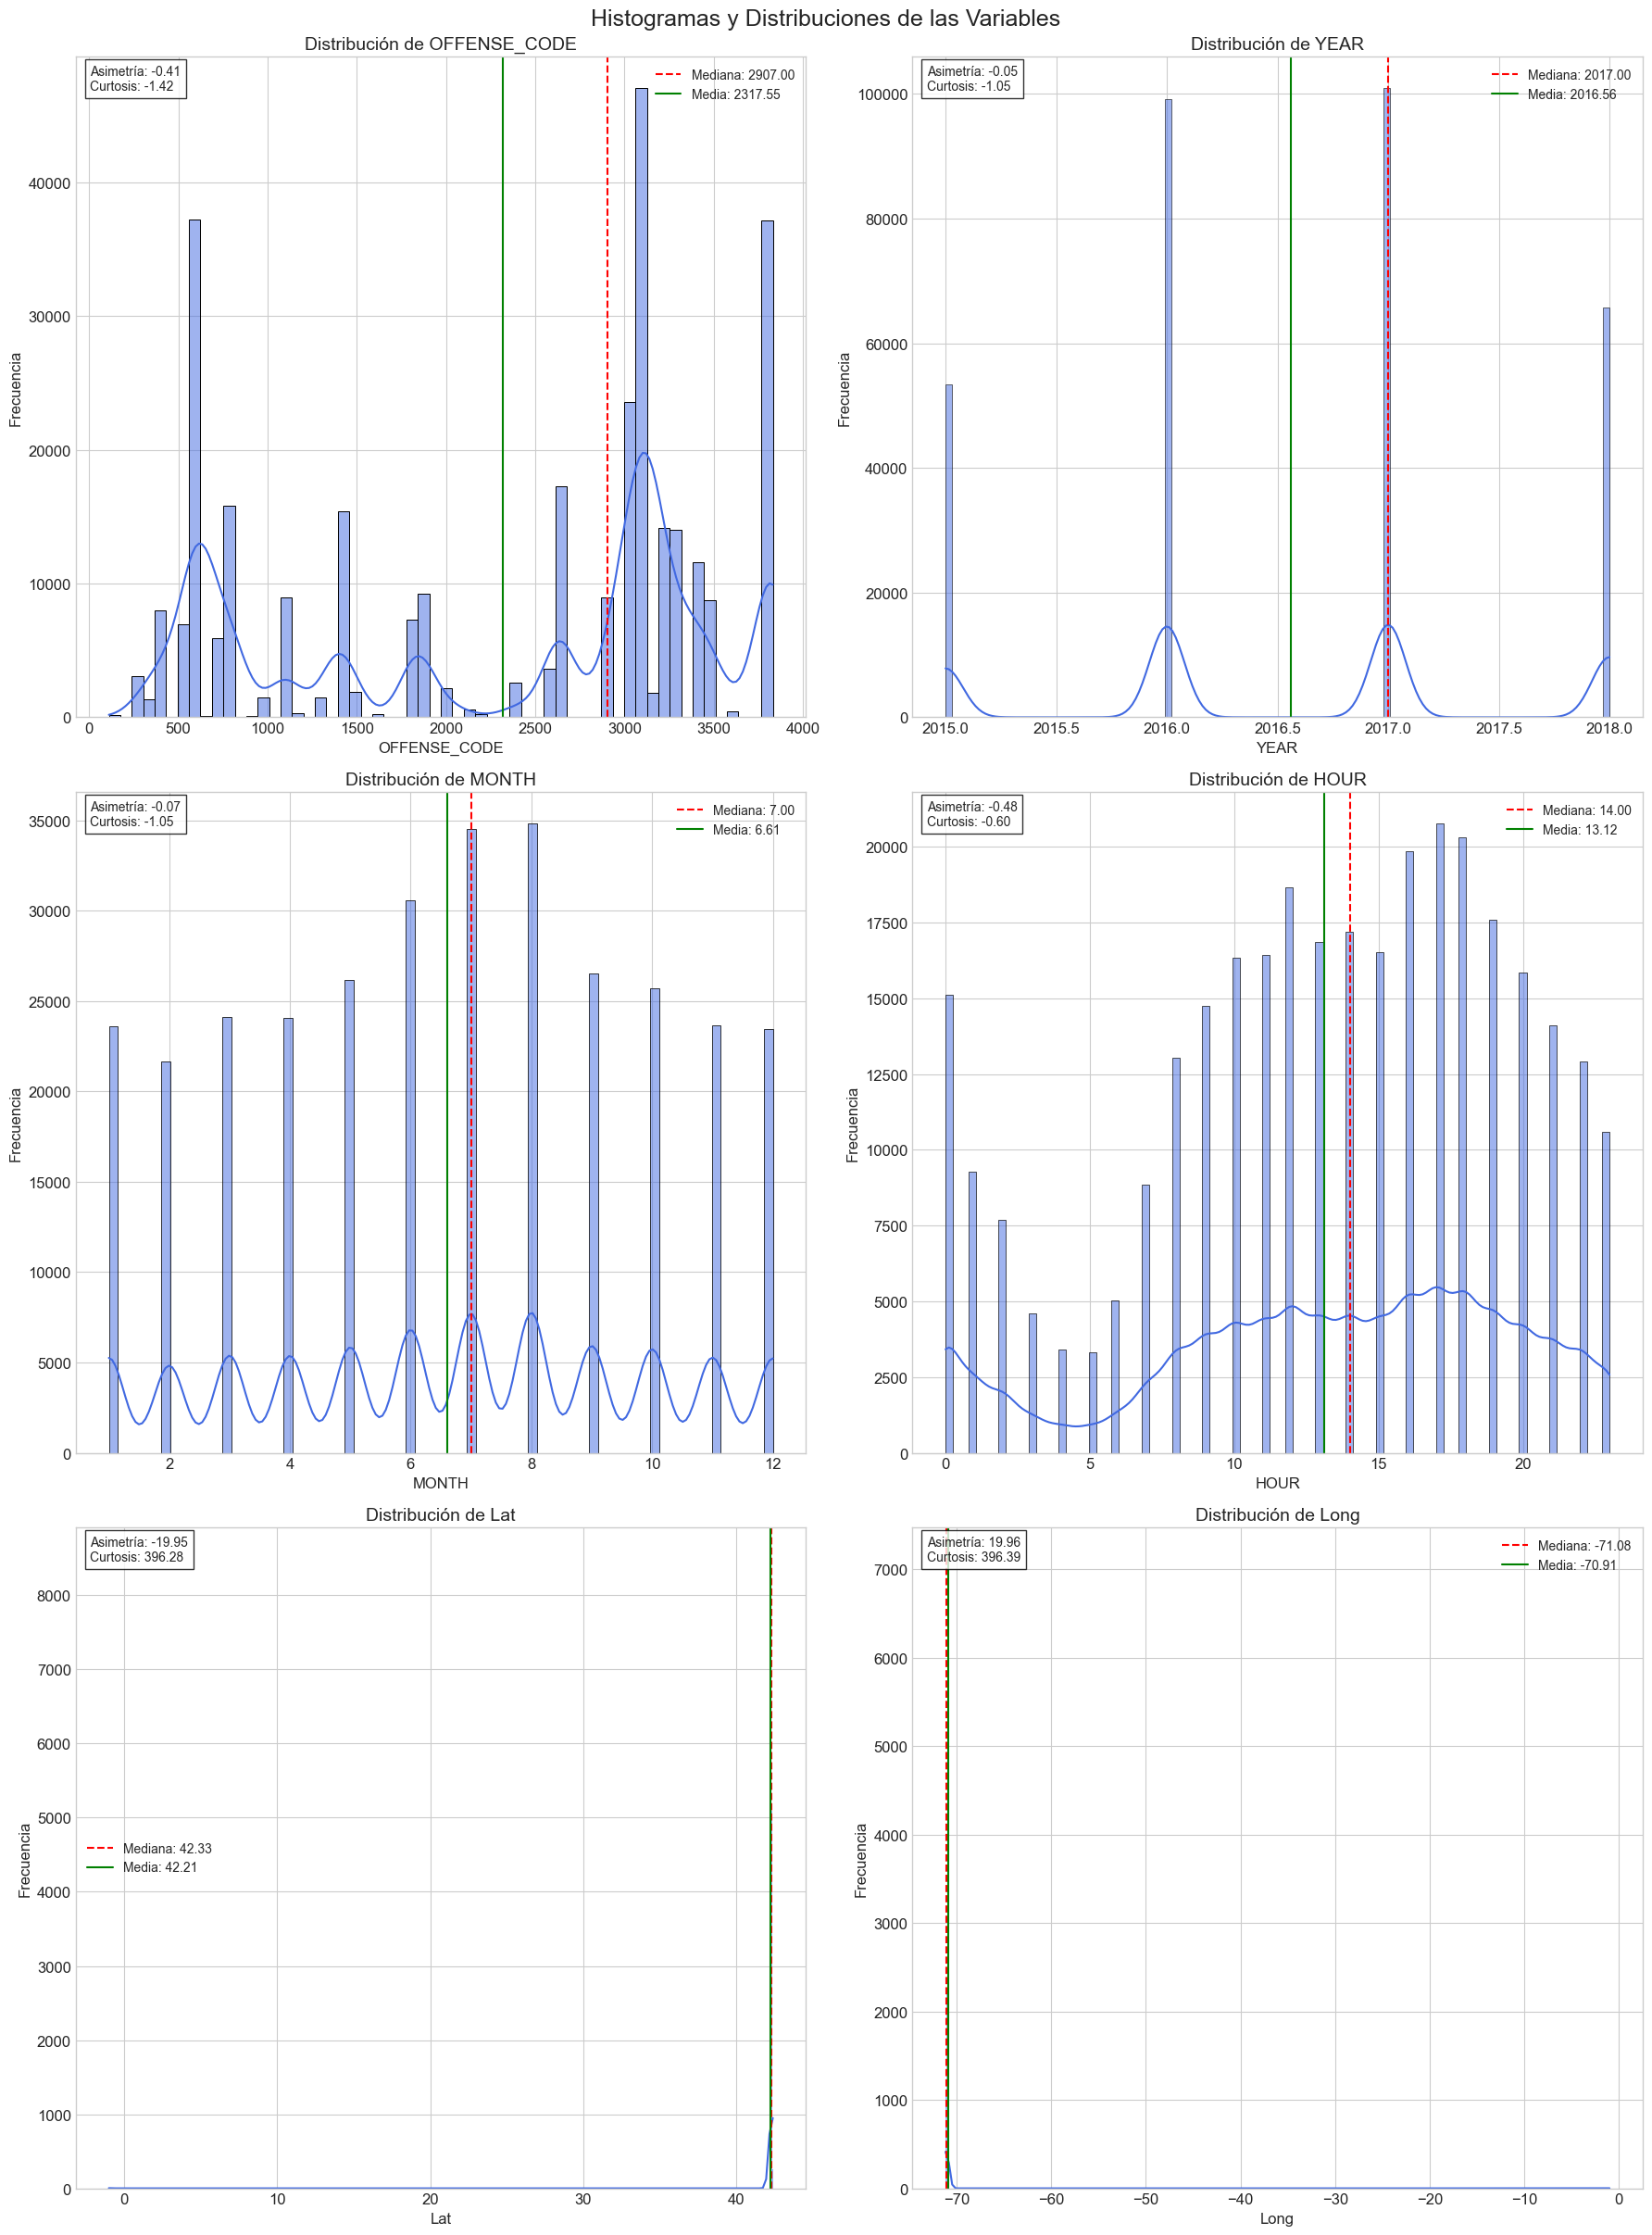

In [9]:
plot_distributions(df_crime)

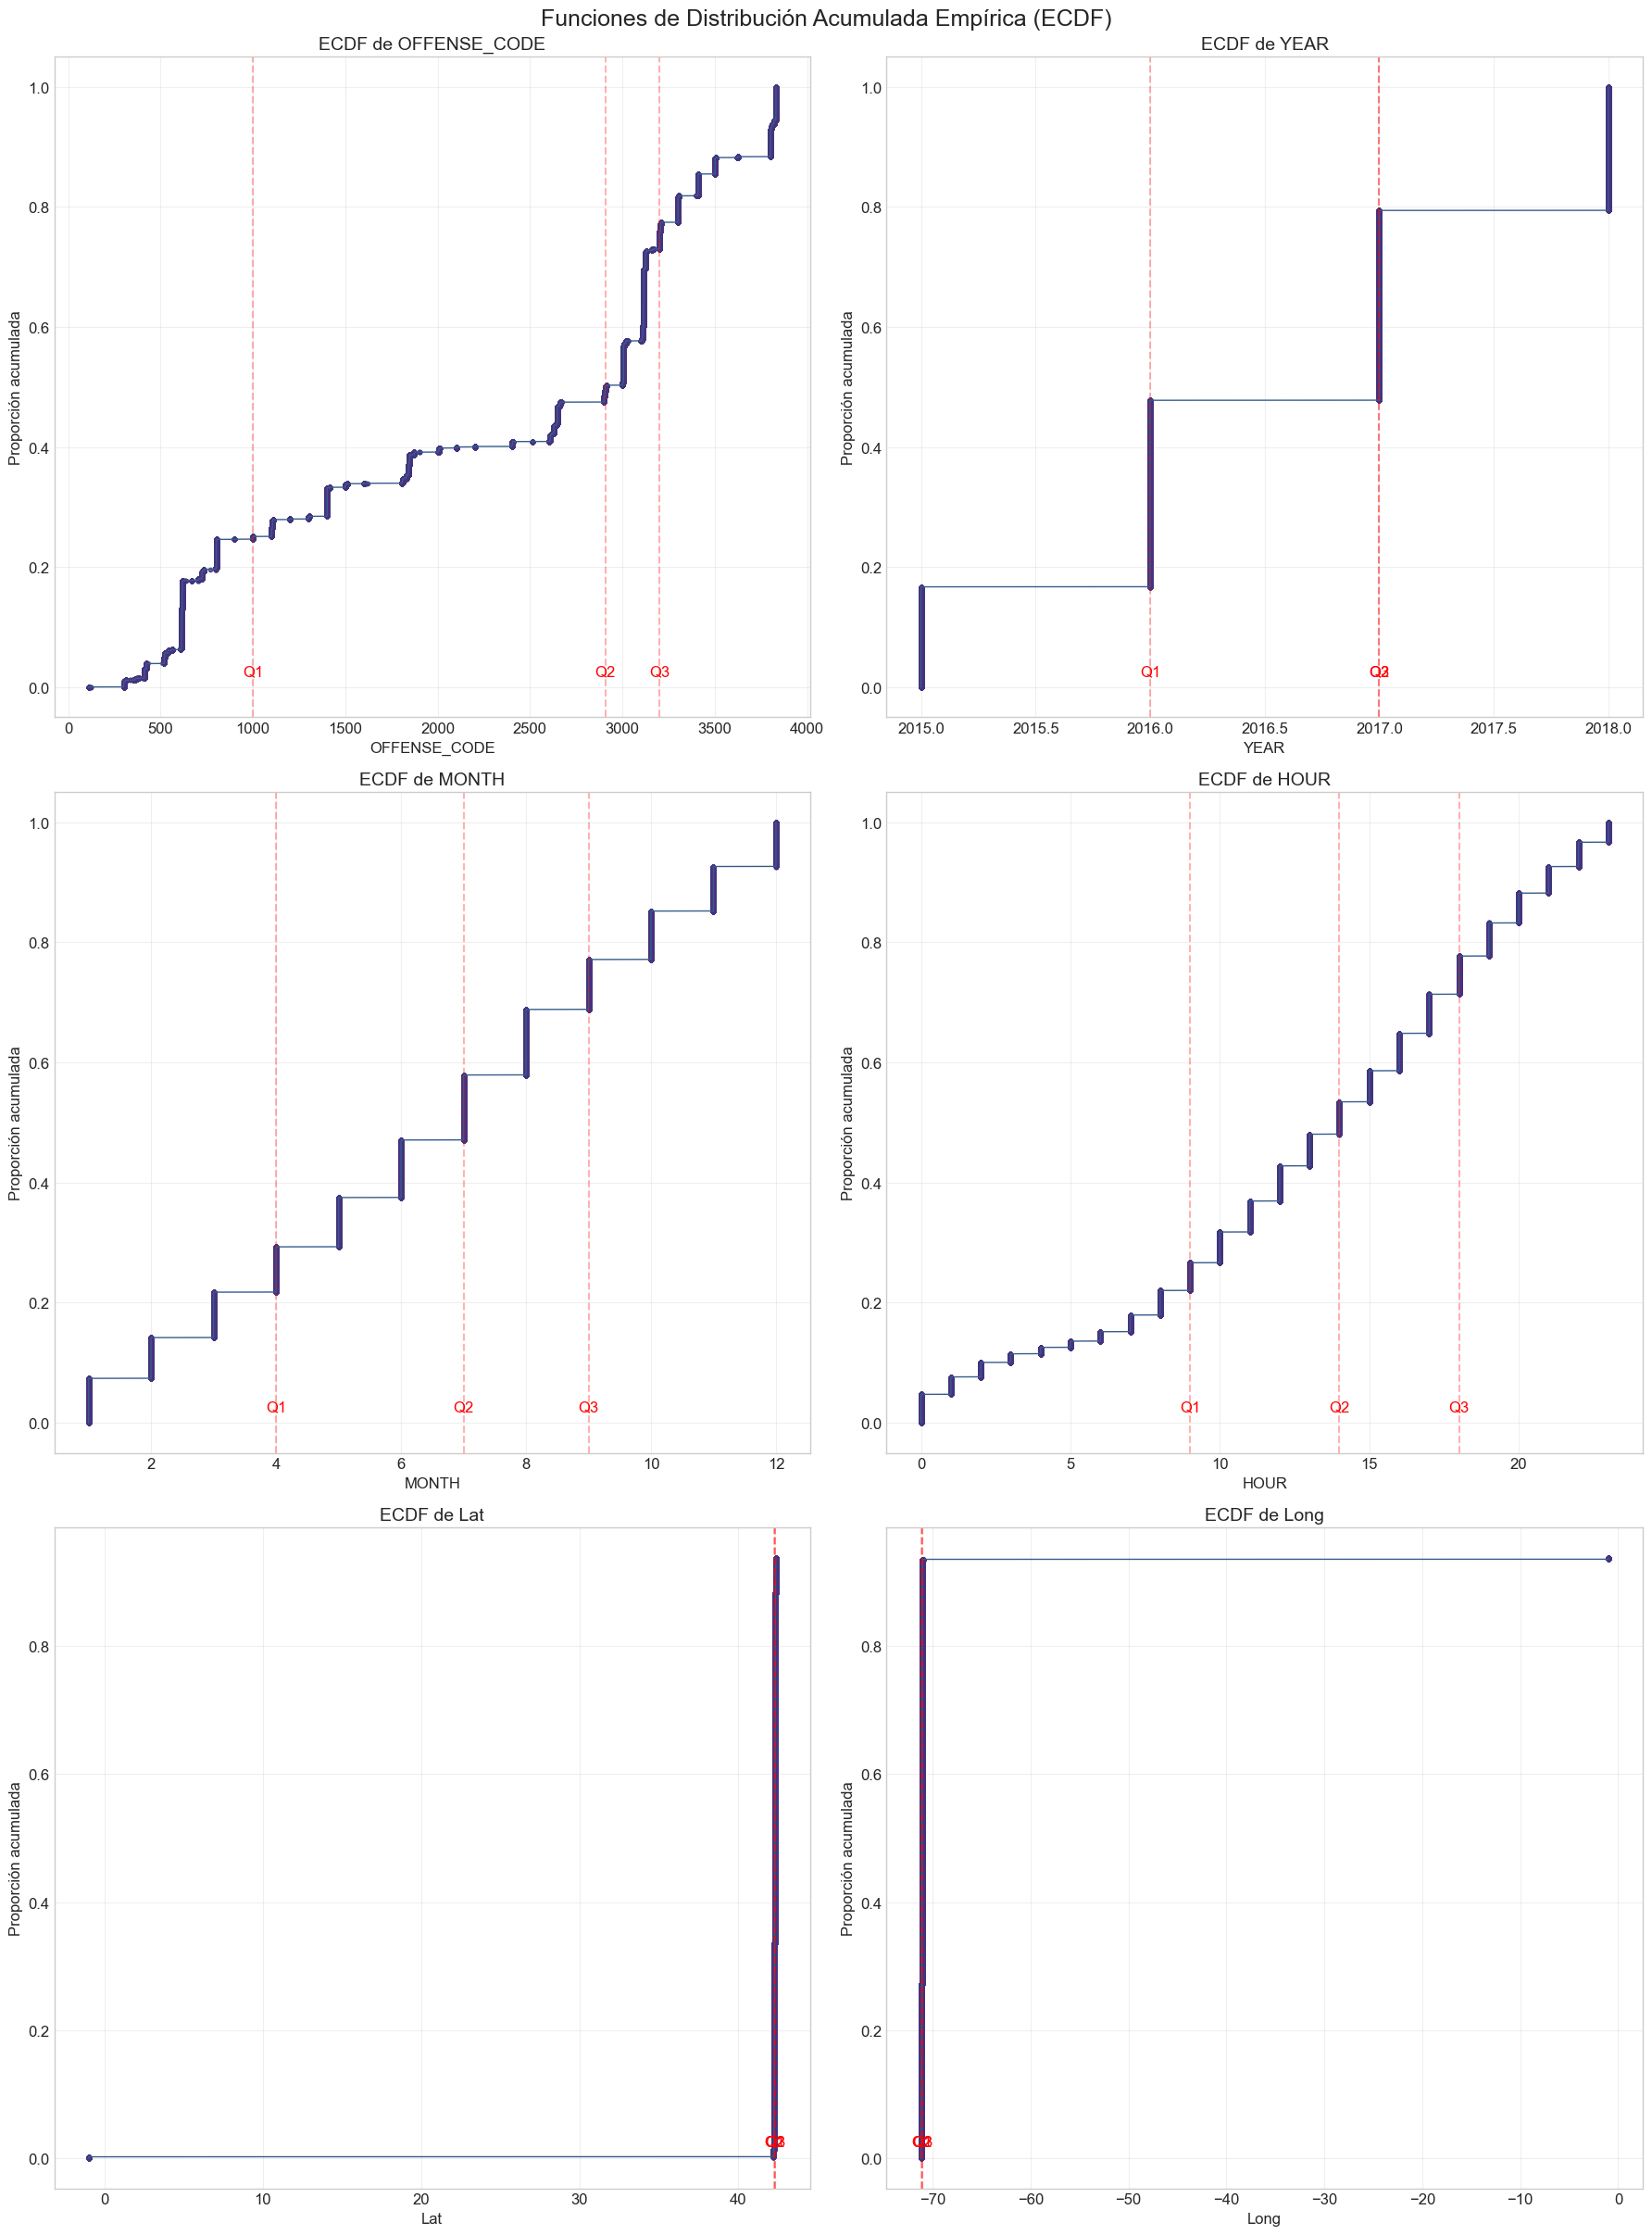

In [10]:
plot_ecdfs(df_crime).show()

### Análisis Boxplot y Outliers

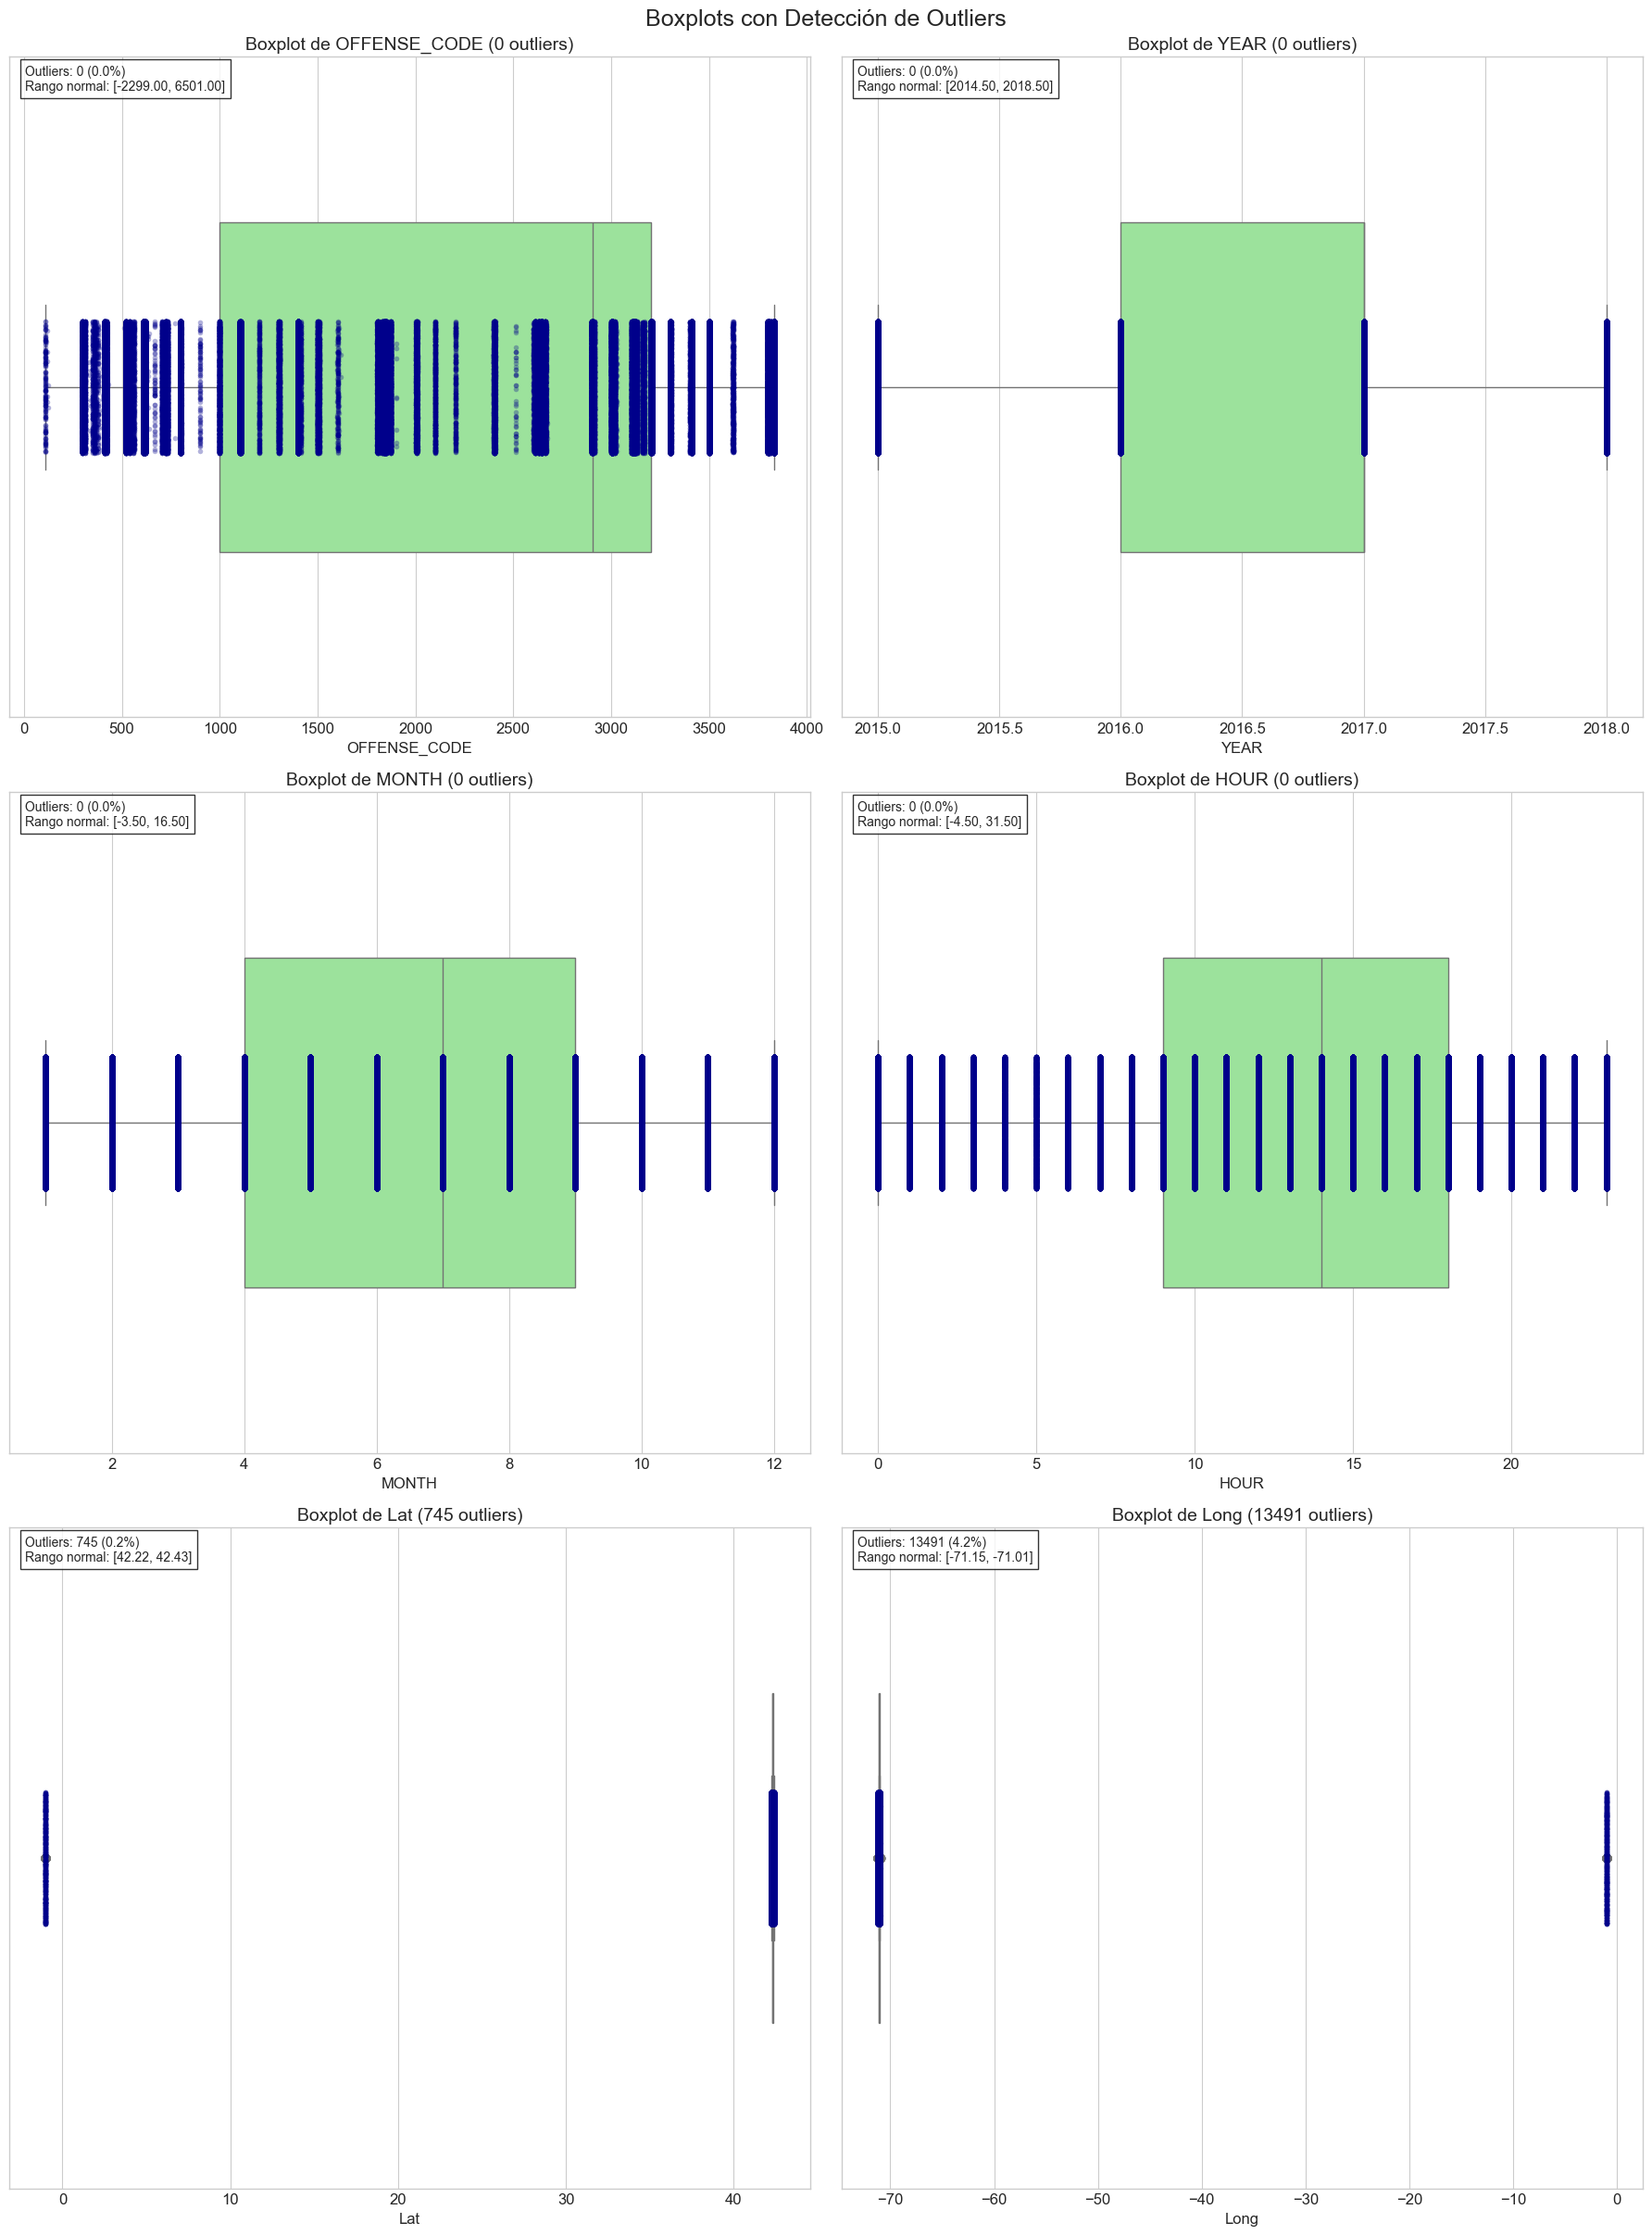

In [11]:
plot_boxplots(df_crime).show()

### Correlación entre variables numéricas

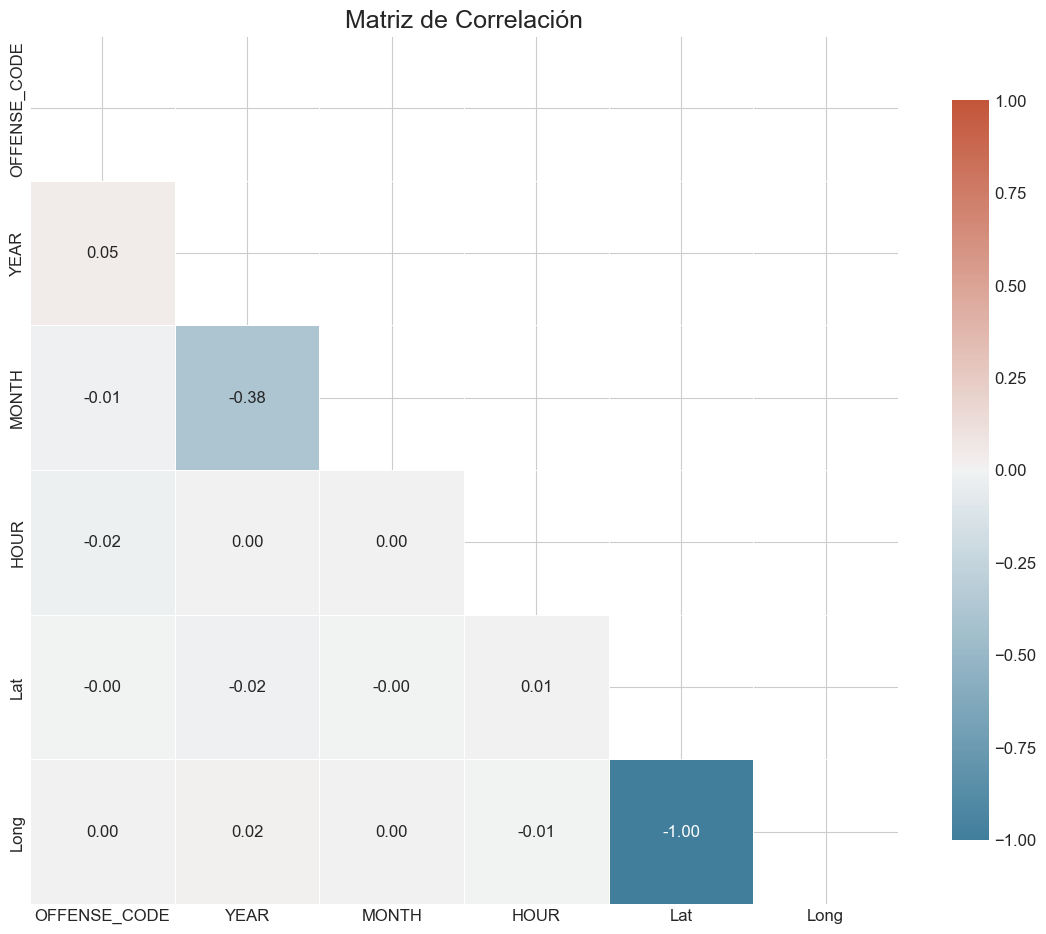

In [12]:
plot_correlation_matrix(df_crime).show()

### Crimenes por mes y dias

In [13]:
def analizar_crimenes_por_tiempo(df_crime):
    """
    Analiza y visualiza la distribución de crímenes por mes y día de la semana.
    
    Parámetros:
    -----------
    df_crime : DataFrame
        DataFrame con los datos de crímenes de Boston.
        
    Retorna:
    --------
    None. Genera visualizaciones interactivas.
    """
    
    # Hacemos una copia para no modificar el DataFrame original
    df = df_crime.copy()
    
    # Aseguramos que la columna de fecha esté en formato datetime
    # Asumimos que la columna se llama 'OCCURRED_ON_DATE', pero podría tener otro nombre
    fecha_col = [col for col in df.columns if 'DATE' in col.upper() or 'OCCUR' in col.upper()]
    if fecha_col:
        fecha_col = fecha_col[0]
    else:
        # Si no encontramos una columna obvia, buscamos columnas que podrían ser fechas
        for col in df.columns:
            if df[col].dtype == 'object':
                try:
                    pd.to_datetime(df[col].iloc[0])
                    fecha_col = col
                    break
                except:
                    continue
    
    # Convertimos la columna de fecha a datetime si no lo es ya
    if fecha_col:
        if df[fecha_col].dtype != 'datetime64[ns]':
            df[fecha_col] = pd.to_datetime(df[fecha_col], errors='coerce')
    else:
        print("No se pudo identificar una columna de fecha. Por favor, especifique el nombre correcto.")
        return
    
    # Extraemos el mes y el día de la semana
    df['Mes'] = df[fecha_col].dt.month
    df['Dia_Semana'] = df[fecha_col].dt.dayofweek
    
    # Nombres de los meses y días para una mejor visualización
    meses = {i: month_name[i] for i in range(1, 13)}
    dias = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 
            4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
    
    # Reemplazamos los números por nombres
    df['Mes_Nombre'] = df['Mes'].map(meses)
    df['Dia_Nombre'] = df['Dia_Semana'].map(dias)
    
    # Configuramos el estilo de las gráficas
    plt.style.use('ggplot')
    
    # Creamos una figura con dos subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # 1. Análisis por mes
    crimenes_por_mes = df.groupby('Mes')['Mes'].count().reindex(range(1, 13))
    sns.barplot(x=crimenes_por_mes.index, y=crimenes_por_mes.values, ax=axes[0])
    axes[0].set_title('Número de Crímenes por Mes', fontsize=16)
    axes[0].set_xlabel('Mes', fontsize=14)
    axes[0].set_ylabel('Número de Crímenes', fontsize=14)
    axes[0].set_xticklabels([month_name[i][0:3] for i in range(1, 13)], rotation=45)
    
    # Añadimos valores sobre las barras
    for i, v in enumerate(crimenes_por_mes.values):
        axes[0].text(i, v + max(crimenes_por_mes) * 0.02, f'{v:,}', 
                     ha='center', va='bottom', fontsize=10)
    
    # 2. Análisis por día de la semana
    crimenes_por_dia = df.groupby('Dia_Semana')['Dia_Semana'].count().reindex(range(7))
    sns.barplot(x=crimenes_por_dia.index, y=crimenes_por_dia.values, ax=axes[1])
    axes[1].set_title('Número de Crímenes por Día de la Semana', fontsize=16)
    axes[1].set_xlabel('Día de la Semana', fontsize=14)
    axes[1].set_ylabel('Número de Crímenes', fontsize=14)
    axes[1].set_xticklabels([dias[i] for i in range(7)], rotation=45)
    
    # Añadimos valores sobre las barras
    for i, v in enumerate(crimenes_por_dia.values):
        axes[1].text(i, v + max(crimenes_por_dia) * 0.02, f'{v:,}', 
                     ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis adicional: Mapa de calor de crímenes por mes y día de la semana
    print("\nMapa de calor de crímenes por mes y día de la semana:")
    
    # Creamos una tabla pivote para el mapa de calor
    crimenes_pivot = pd.crosstab(index=df['Dia_Nombre'], columns=df['Mes_Nombre'], 
                                 values=df[fecha_col], aggfunc='count')
    
    # Reordenamos los índices para una visualización más lógica
    crimenes_pivot = crimenes_pivot.reindex([dias[i] for i in range(7)])
    crimenes_pivot = crimenes_pivot.reindex(columns=[meses[i] for i in range(1, 13)])
    
    plt.figure(figsize=(14, 8))
    sns.heatmap(crimenes_pivot, annot=True, fmt='.0f', cmap='YlOrRd')
    plt.title('Distribución de Crímenes por Día de la Semana y Mes', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Análisis por hora del día (si está disponible)
    if hasattr(df[fecha_col].dt, 'hour'):
        df['Hora'] = df[fecha_col].dt.hour
        
        plt.figure(figsize=(14, 6))
        crimenes_por_hora = df.groupby('Hora')['Hora'].count()
        sns.lineplot(x=crimenes_por_hora.index, y=crimenes_por_hora.values, 
                    marker='o', linewidth=2)
        plt.title('Distribución de Crímenes por Hora del Día', fontsize=16)
        plt.xlabel('Hora del Día', fontsize=14)
        plt.ylabel('Número de Crímenes', fontsize=14)
        plt.xticks(range(0, 24))
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    # Retornamos un resumen de los hallazgos
    resumen = {
        'mes_max_crimenes': meses[crimenes_por_mes.idxmax()],
        'mes_min_crimenes': meses[crimenes_por_mes.idxmin()],
        'dia_max_crimenes': dias[crimenes_por_dia.idxmax()],
        'dia_min_crimenes': dias[crimenes_por_dia.idxmin()]
    }
    
    print(f"\nResumen de hallazgos:")
    print(f"- El mes con más crímenes es: {resumen['mes_max_crimenes']}")
    print(f"- El mes con menos crímenes es: {resumen['mes_min_crimenes']}")
    print(f"- El día de la semana con más crímenes es: {resumen['dia_max_crimenes']}")
    print(f"- El día de la semana con menos crímenes es: {resumen['dia_min_crimenes']}")
    
    return resumen

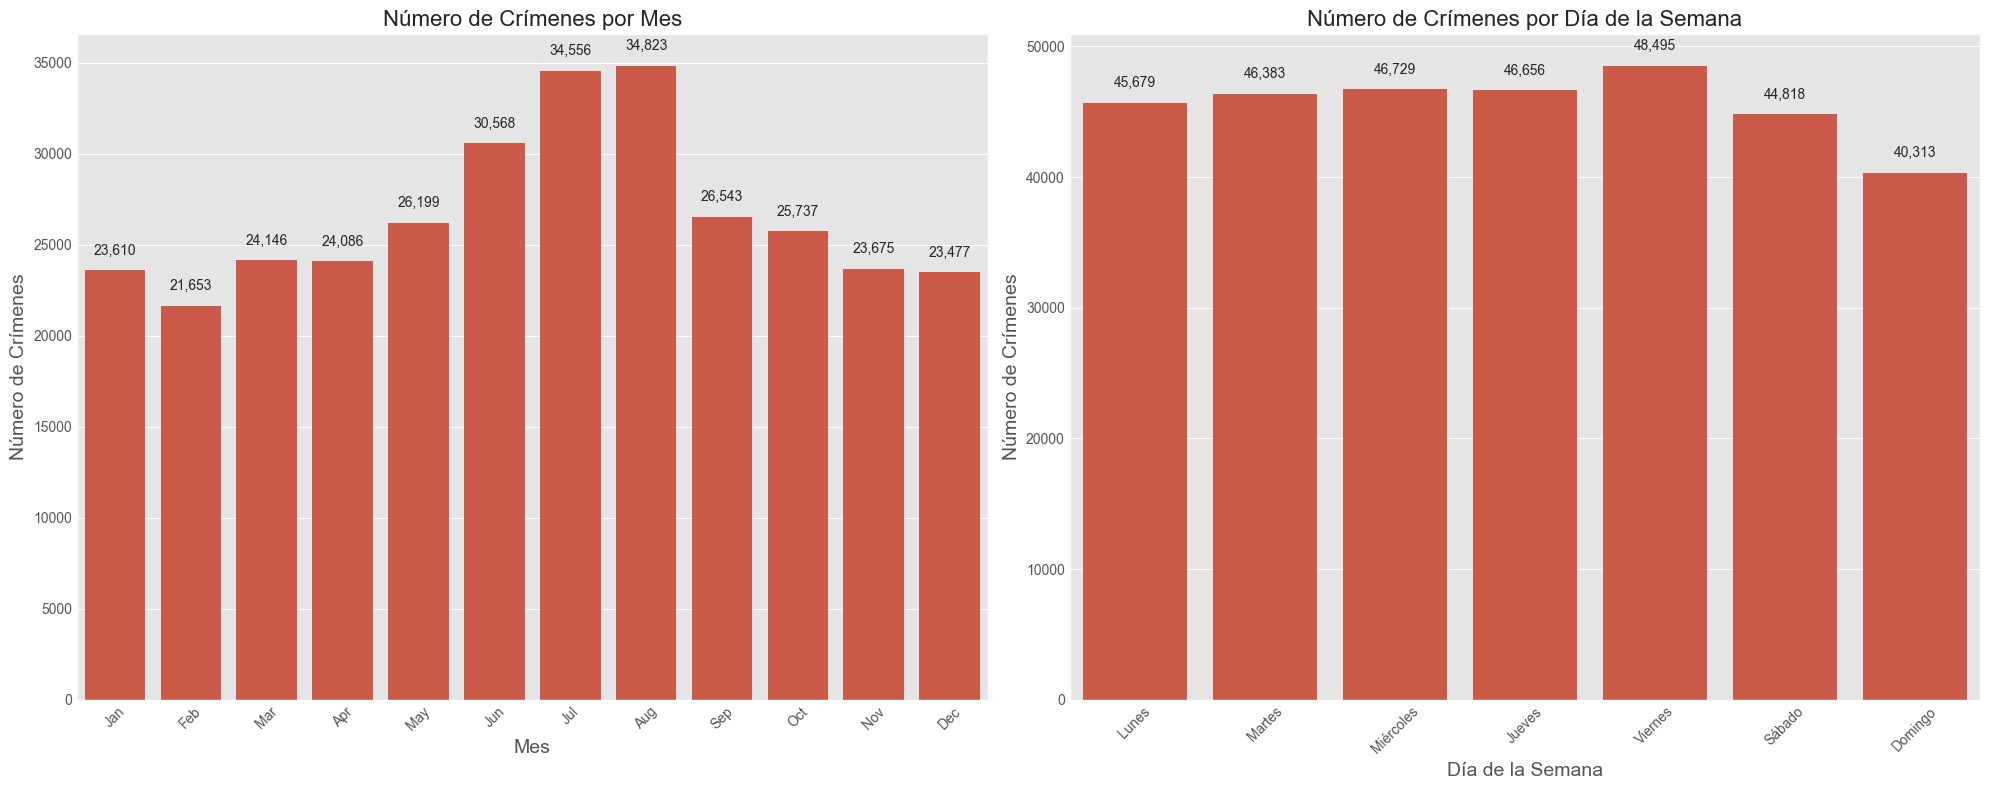


Mapa de calor de crímenes por mes y día de la semana:


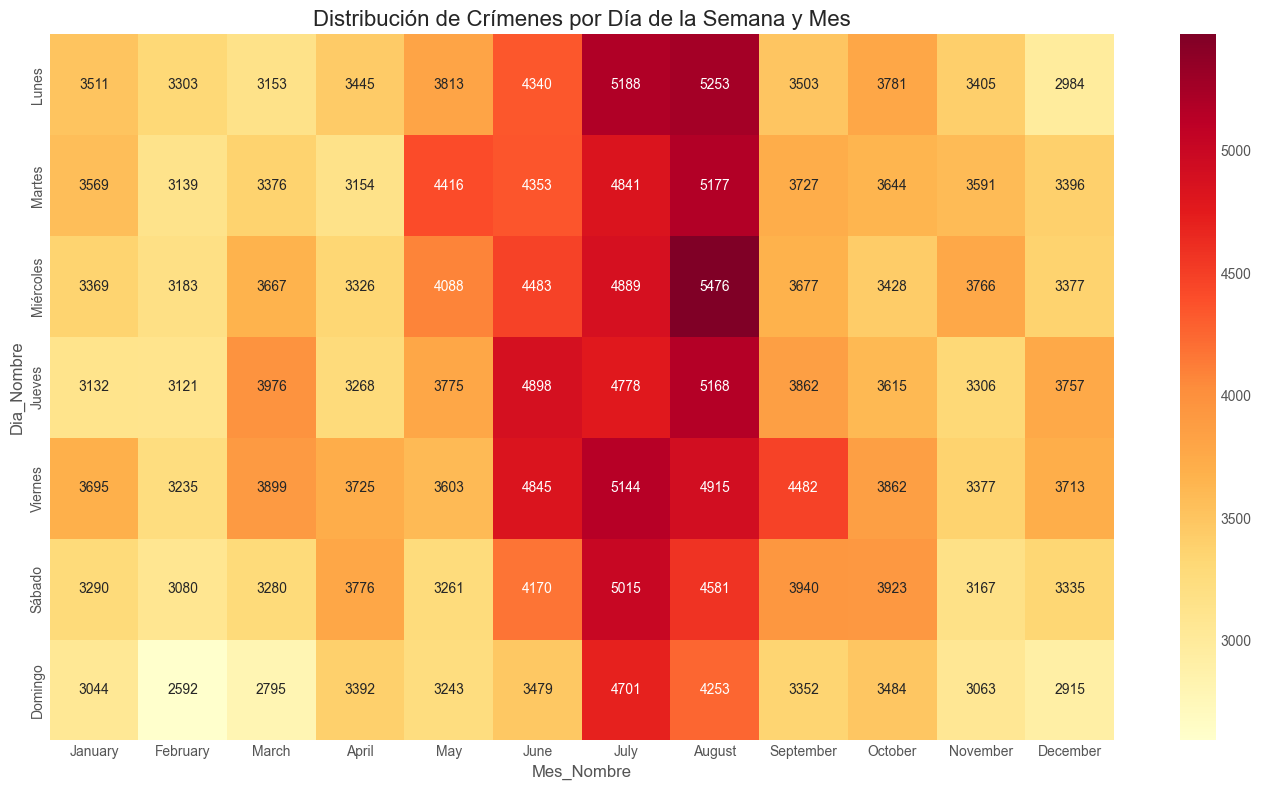

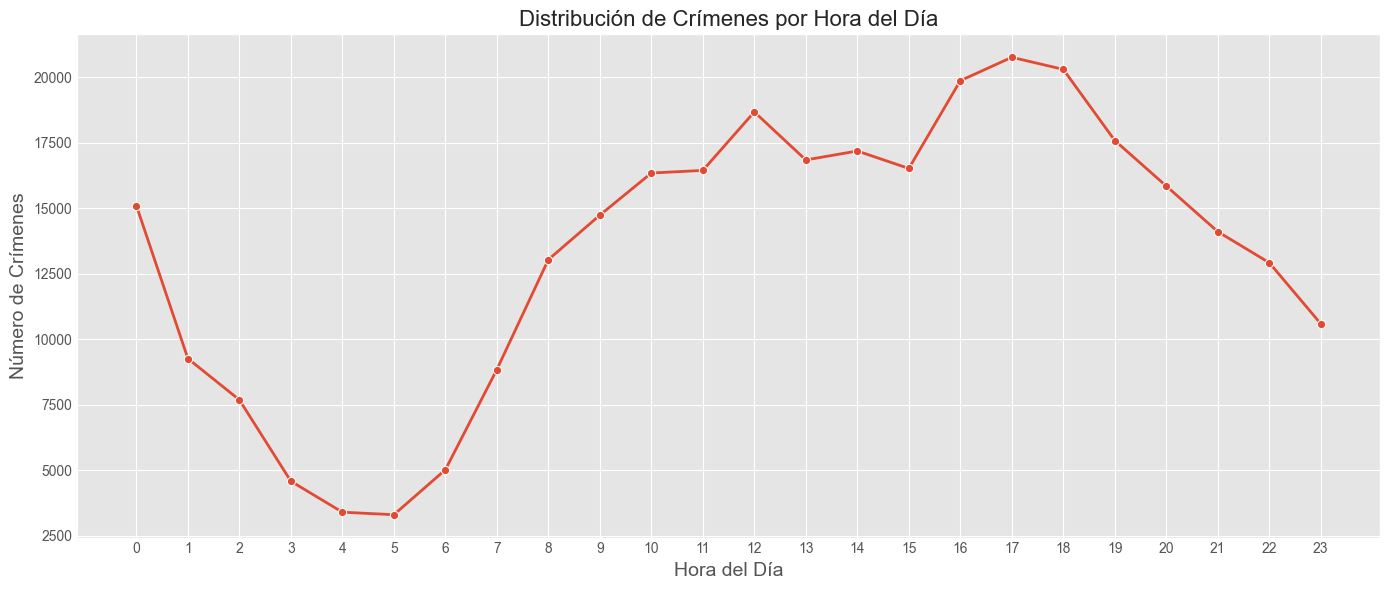


Resumen de hallazgos:
- El mes con más crímenes es: August
- El mes con menos crímenes es: February
- El día de la semana con más crímenes es: Viernes
- El día de la semana con menos crímenes es: Domingo


{'mes_max_crimenes': 'August',
 'mes_min_crimenes': 'February',
 'dia_max_crimenes': 'Viernes',
 'dia_min_crimenes': 'Domingo'}

In [14]:
analizar_crimenes_por_tiempo(df_crime)

### Análisis de crímenes por lugar

In [15]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [16]:
def analizar_crimenes_por_lugar(df_crime, top_n=10, mostrar_mapa=True):
    """
    Analiza y visualiza la distribución de crímenes por ubicación.
    
    Parámetros:
    -----------
    df_crime : DataFrame
        DataFrame con los datos de crímenes de Boston.
    top_n : int, opcional (predeterminado=10)
        Número de ubicaciones principales a mostrar.
    mostrar_mapa : bool, opcional (predeterminado=True)
        Si es True, intenta generar un mapa de calor con las coordenadas.
        
    Retorna:
    --------
    DataFrame con las ubicaciones con más crímenes.
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    
    # Hacemos una copia para no modificar el DataFrame original
    df = df_crime.copy()
    
    # Identificamos la columna que contiene información de ubicación
    # Posibles nombres comunes para columnas de ubicación
    posibles_cols_lugar = ['LOCATION', 'STREET', 'ADDRESS', 'DISTRICT', 'REPORTING_AREA', 
                          'LOCATION_TYPE', 'PLACE', 'NEIGHBORHOOD']
    
    # Intentamos encontrar columnas que contengan información de ubicación
    cols_lugar = [col for col in df.columns if any(keyword in col.upper() for keyword in posibles_cols_lugar)]
    
    if not cols_lugar:
        print("No se pudieron identificar columnas de ubicación. Por favor, especifique los nombres correctos.")
        return None
    
    # Analizamos cada columna de ubicación encontrada
    for lugar_col in cols_lugar:
        print(f"\n--- Análisis para {lugar_col} ---")
        
        # Contamos los crímenes por ubicación
        crimenes_por_lugar = df[lugar_col].value_counts().reset_index()
        crimenes_por_lugar.columns = [lugar_col, 'Número de Crímenes']
        
        # Mostramos las ubicaciones con más crímenes
        print(f"\nTop {top_n} ubicaciones con más crímenes:")
        print(crimenes_por_lugar.head(top_n))
        
        # Visualizamos las ubicaciones principales
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Número de Crímenes', y=lugar_col, 
                   data=crimenes_por_lugar.head(top_n).sort_values('Número de Crímenes'))
        plt.title(f'Top {top_n} Ubicaciones con Mayor Número de Crímenes', fontsize=16)
        plt.xlabel('Número de Crímenes', fontsize=14)
        plt.ylabel(lugar_col, fontsize=14)
        plt.tight_layout()
        plt.show()
        
    # Si existen coordenadas y se solicita mostrar mapa, generamos un mapa de calor
    if mostrar_mapa:
        # Buscamos columnas de latitud y longitud
        lat_cols = [col for col in df.columns if 'LAT' in col.upper()]
        long_cols = [col for col in df.columns if 'LONG' in col.upper() or 'LNG' in col.upper()]
        
        if lat_cols and long_cols:
            try:          
                lat_col = lat_cols[0]
                long_col = long_cols[0]
                
                # Filtramos filas con coordenadas válidas
                map_data = df[[lat_col, long_col]].dropna()
                
                # Verificamos que tenemos suficientes datos para el mapa
                if len(map_data) > 0:
                    # Calculamos el centro del mapa (promedio de coordenadas)
                    center_lat = map_data[lat_col].mean()
                    center_long = map_data[long_col].mean()
                    
                    # Creamos el mapa base
                    mapa = folium.Map(location=[center_lat, center_long], zoom_start=12,
                                     tiles='CartoDB positron')
                    
                    # Añadimos el mapa de calor
                    heat_data = [[row[lat_col], row[long_col]] for _, row in map_data.iterrows()]
                    HeatMap(heat_data, radius=15).add_to(mapa)
                    
                    # Guardamos el mapa como HTML
                    mapa_html = 'mapa_crimenes_boston.html'
                    mapa.save(mapa_html)
                    
                    print(f"\nMapa de calor generado y guardado como '{mapa_html}'")
                    
                    # Intentamos mostrar el mapa en el notebook
                    try:
                        from IPython.display import IFrame, display
                        display(IFrame(mapa_html, width=800, height=600))
                    except:
                        print(f"El mapa se ha guardado, pero no se puede mostrar directamente en el notebook.")
                else:
                    print("No hay suficientes datos de coordenadas válidas para generar el mapa.")
            except ImportError:
                print("Para generar mapas, instale folium con: pip install folium")
        else:
            print("No se encontraron columnas de latitud y longitud para generar el mapa.")
    
    # Análisis adicional: Relación entre ubicación y tipo de crimen (si está disponible)
    crime_type_cols = [col for col in df.columns if 'TYPE' in col.upper() or 'OFFENSE' in col.upper() 
                      or 'CATEGORY' in col.upper() or 'CODE' in col.upper()]
    
    if crime_type_cols and cols_lugar:
        crime_type_col = crime_type_cols[0]
        lugar_col = cols_lugar[0]  # Usamos la primera columna de ubicación
        
        print(f"\n--- Análisis de tipos de crímenes por ubicación ({lugar_col}) ---")
        
        # Obtenemos las ubicaciones principales
        top_locations = crimenes_por_lugar[lugar_col].head(5).tolist()
        
        # Filtramos el dataframe para incluir solo estas ubicaciones
        df_top_locations = df[df[lugar_col].isin(top_locations)]
        
        # Contamos los tipos de crímenes para cada ubicación principal
        crime_by_location = pd.crosstab(df_top_locations[lugar_col], df_top_locations[crime_type_col])
        
        # Mostramos los 3 tipos de crímenes más comunes para cada ubicación principal
        print("\nTipos de crímenes más comunes por ubicación:")
        for location in top_locations:
            if location in crime_by_location.index:
                top_crimes = crime_by_location.loc[location].sort_values(ascending=False).head(3)
                print(f"\n{location}:")
                for crime_type, count in top_crimes.items():
                    print(f"  - {crime_type}: {count}")
    
    return crimenes_por_lugar.head(top_n)


--- Análisis para DISTRICT ---

Top 10 ubicaciones con más crímenes:
  DISTRICT  Número de Crímenes
0       B2               49945
1      C11               42530
2       D4               41915
3       A1               35717
4       B3               35442
5       C6               23460
6      D14               20127
7      E13               17536
8      E18               17348
9       A7               13544


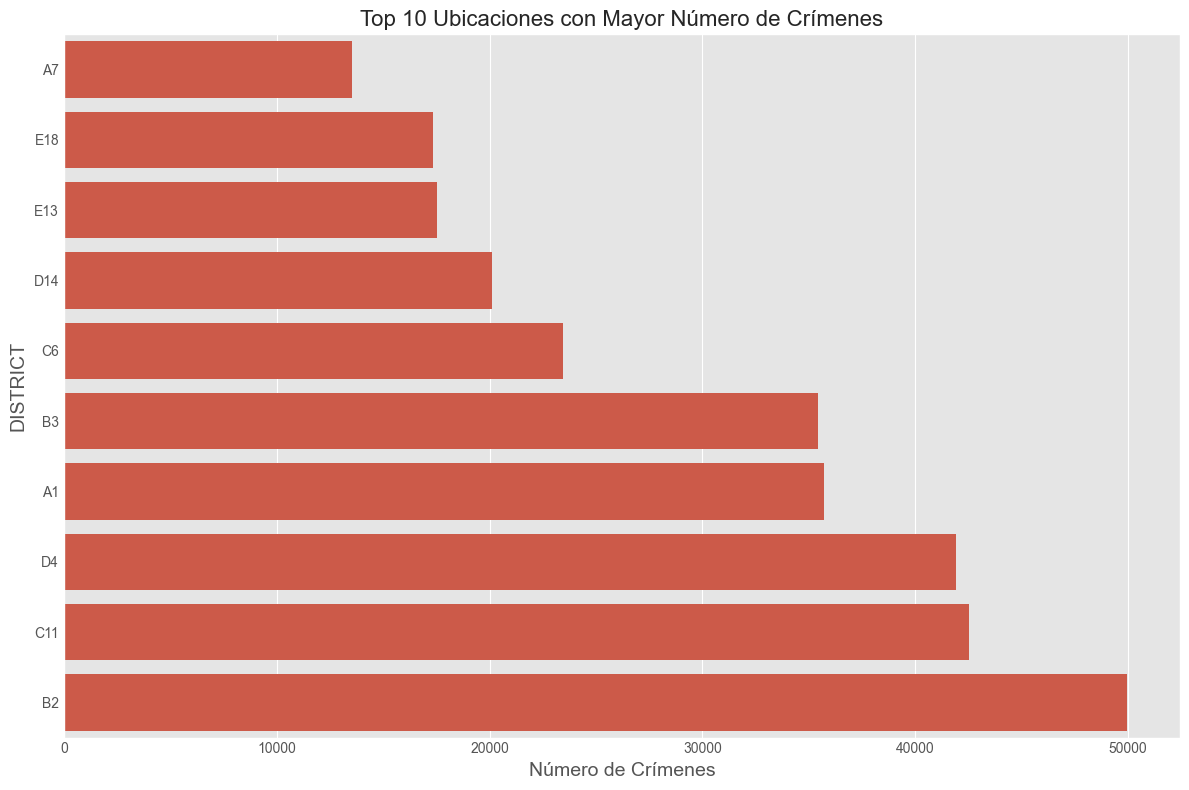


--- Análisis para REPORTING_AREA ---

Top 10 ubicaciones con más crímenes:
  REPORTING_AREA  Número de Crímenes
0                              20250
1            111                2372
2            186                2016
3            329                1878
4            117                1832
5            143                1775
6            624                1751
7             26                1747
8            465                1650
9            130                1423


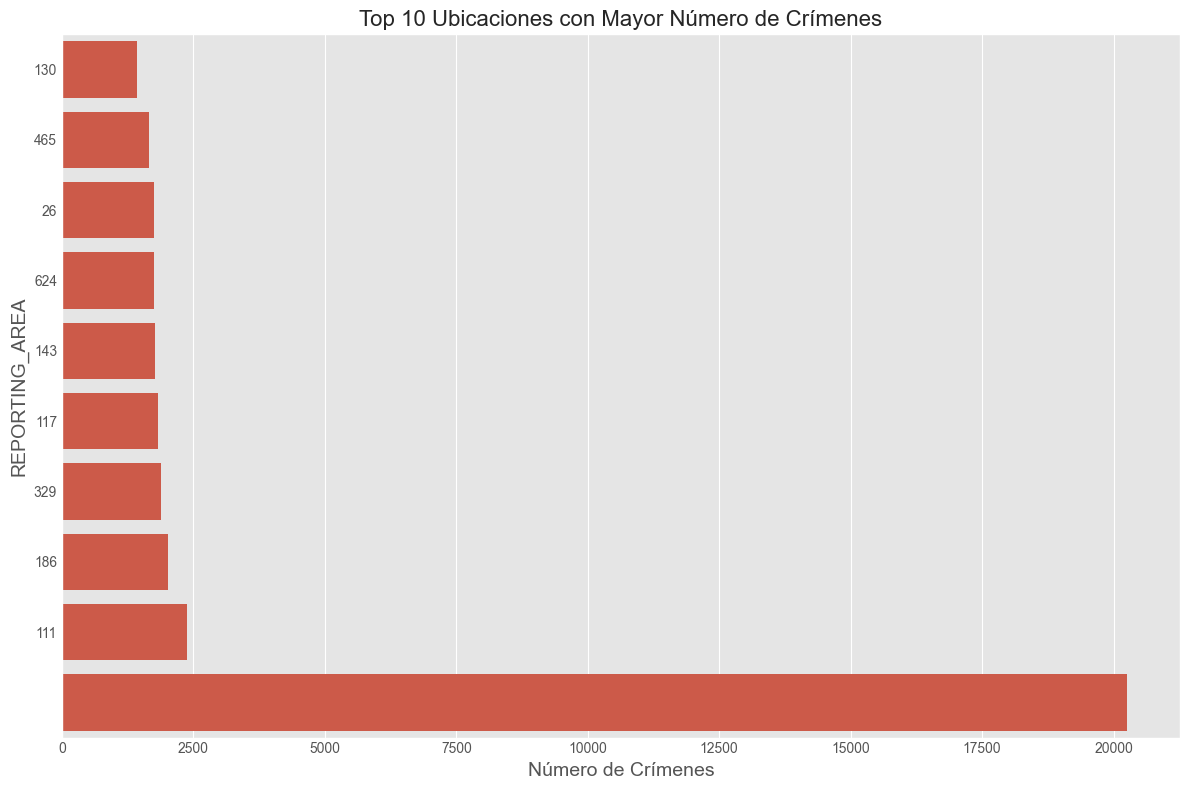


--- Análisis para STREET ---

Top 10 ubicaciones con más crímenes:
              STREET  Número de Crímenes
0      WASHINGTON ST               14194
1      BLUE HILL AVE                7794
2        BOYLSTON ST                7221
3     DORCHESTER AVE                5149
4         TREMONT ST                4796
5  MASSACHUSETTS AVE                4708
6       HARRISON AVE                4609
7          CENTRE ST                4383
8   COMMONWEALTH AVE                4134
9      HYDE PARK AVE                3470


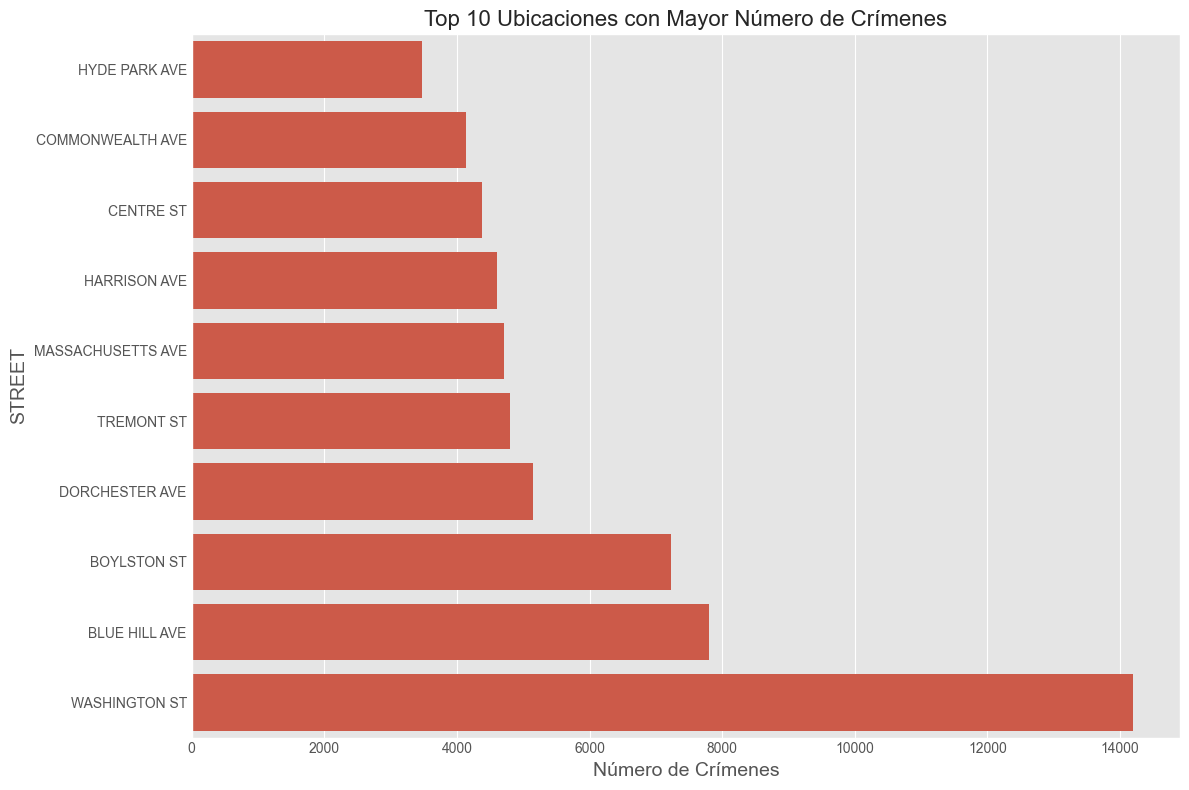


--- Análisis para Location ---

Top 10 ubicaciones con más crímenes:
                      Location  Número de Crímenes
0     (0.00000000, 0.00000000)               19999
1  (42.34862382, -71.08277637)                1243
2  (42.36183857, -71.05976489)                1208
3  (42.28482577, -71.09137369)                1121
4  (42.32866284, -71.08563401)                1042
5  (42.25621592, -71.12401947)                 898
6  (42.29755533, -71.05970910)                 783
7  (42.34128751, -71.05467933)                 773
8   (-1.00000000, -1.00000000)                 745
9  (42.33152148, -71.07085307)                 735


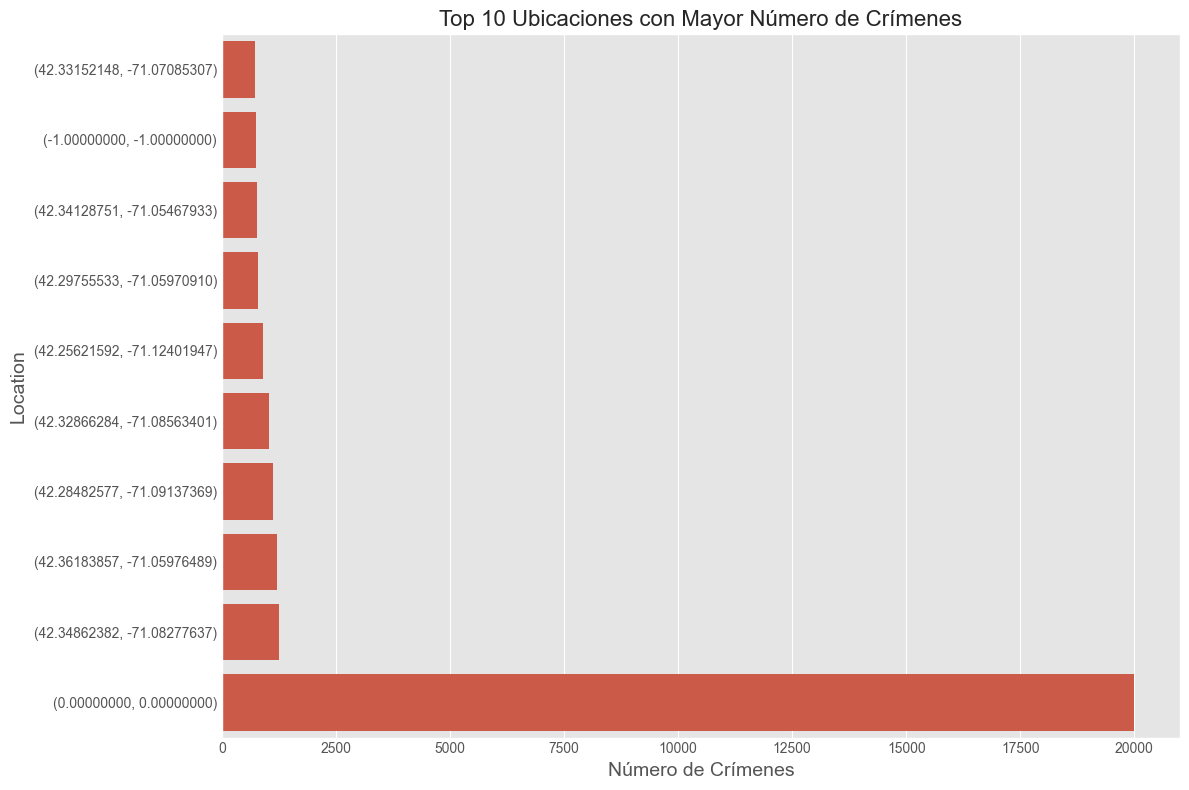


Mapa de calor generado y guardado como 'mapa_crimenes_boston.html'



--- Análisis de tipos de crímenes por ubicación (DISTRICT) ---


KeyError: 'DISTRICT'

In [17]:
analizar_crimenes_por_lugar(df_crime)

# Modelo Red Neuronal

In [18]:
import tensorflow as tf
def setup_tf_session():
    """
    Configura TensorFlow para aprovechar al máximo los recursos de la CPU y GPU.
    Optimizado para un procesador Intel Core i9-14900HX con 24 núcleos.
    """
    # Configurar TensorFlow para usar memoria de GPU de manera eficiente
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Permitir crecimiento de memoria según sea necesario
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(f"Error al configurar la memoria de GPU: {e}")

    # Configurar el uso de múltiples núcleos de CPU
    num_physical_cores = 24  # Número de núcleos físicos del Intel Core i9-14900HX
    num_threads = num_physical_cores * 2  # Hilos lógicos (Hyper-Threading)

    try:
        tf.config.threading.set_intra_op_parallelism_threads(num_threads)
        tf.config.threading.set_inter_op_parallelism_threads(num_physical_cores)
        print(f"TensorFlow configurado para usar {num_threads} hilos y {num_physical_cores} núcleos físicos.")
    except RuntimeError as e:
        print(f"Error al configurar el paralelismo de TensorFlow: {e}")

In [19]:
setup_tf_session()

TensorFlow configurado para usar 48 hilos y 24 núcleos físicos.


2025-05-08 21:11:36.741663: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2025-05-08 21:11:36.741677: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-05-08 21:11:36.741679: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: anderson-Raider-GE68-HX-14VGG
2025-05-08 21:11:36.741680: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: anderson-Raider-GE68-HX-14VGG
2025-05-08 21:11:36.741757: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 550.144.3
2025-05-08 21:11:36.741765: I ext

In [20]:
# Handle missing values
# For coordinates, we need valid values, so we'll drop rows with missing Lat/Long
df_crime = df_crime.dropna(subset=['Lat', 'Long'])
df_crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [21]:
# Define our target variable - we'll predict the offense code group
# If there are too many categories, we might want to focus on the top N most common crimes
top_crimes = df_crime['OFFENSE_CODE'].value_counts().nlargest(10).index.tolist()
df_filtered = df_crime[df_crime['OFFENSE_CODE'].isin(top_crimes)].copy()
print(f"\nFiltered to top {len(top_crimes)} crime types, new shape: {df_filtered.shape}")


Filtered to top 10 crime types, new shape: (131337, 17)


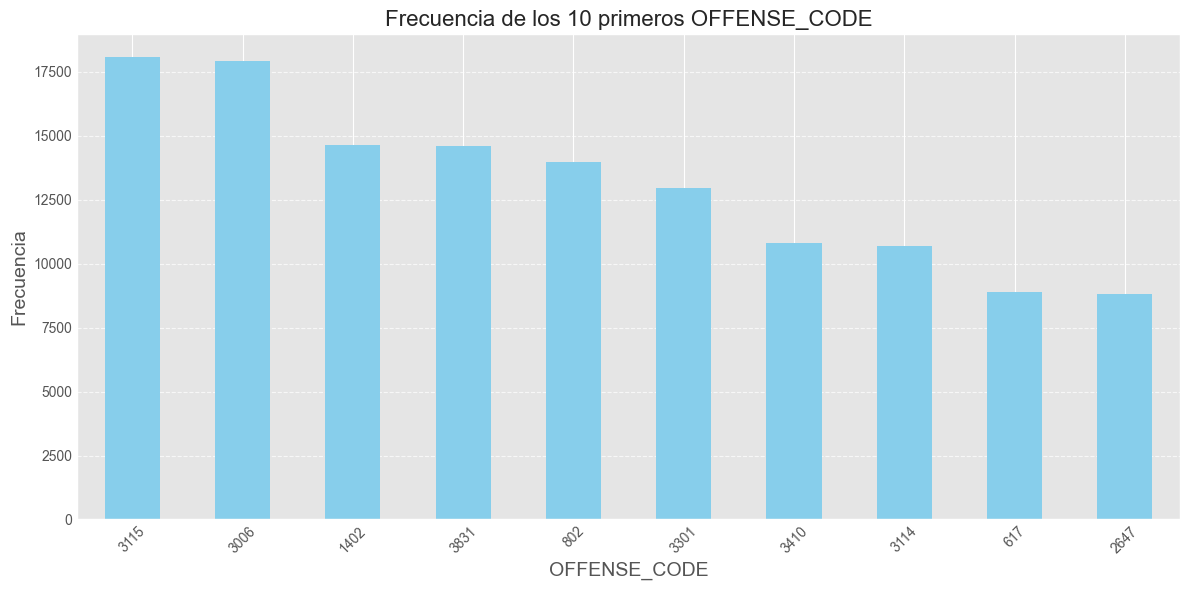

In [22]:
#grafica de frecuencias de OFFENSE_CODE solo para los 10 primeros
df_crime['OFFENSE_CODE'].value_counts().head(10).plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Frecuencia de los 10 primeros OFFENSE_CODE', fontsize=16)
plt.xlabel('OFFENSE_CODE', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [53]:
# Features and target
# We'll use location (Lat, Long), time features (HOUR, DAY_OF_WEEK, MONTH), and DISTRICT
X = df_filtered[['Lat', 'Long', 'HOUR', 'MONTH', 'DISTRICT']]
y = df_filtered['OFFENSE_CODE']

In [54]:
y

1         1402
2         3410
3         3114
4         3114
7         3301
          ... 
319034     802
319035     802
319039    3115
319041    3115
319050     802
Name: OFFENSE_CODE, Length: 131337, dtype: int64

In [24]:
# Convert DAY_OF_WEEK to numerical (if needed)
# X['DAY_OF_WEEK_NUM'] = pd.Categorical(X['DAY_OF_WEEK'], 
#                                       categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
#                                                  'Friday', 'Saturday', 'Sunday']).codes


In [25]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
print(f"\nNumber of target classes: {num_classes}")
print("Target classes:", label_encoder.classes_)


Number of target classes: 10
Target classes: [ 617  802 1402 2647 3006 3114 3115 3301 3410 3831]


## Feature Engineering and Preprocessing Pipeline

In [26]:
# Define preprocessors for different column types
numeric_features = ['Lat', 'Long', 'HOUR', 'MONTH']
categorical_features = ['DISTRICT']

In [27]:
# Create preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [28]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Model Definition

In [29]:
def create_model(input_dim, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

## Cross-Validation Implementation

In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [31]:
# Apply preprocessing to training data to get input dimensions
X_train_processed = preprocessor.fit_transform(X_train)
input_dim = X_train_processed.shape[1]
print(f"Input dimension after preprocessing: {input_dim}")

Input dimension after preprocessing: 17


In [32]:
# Define cross-validation strategy
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [33]:
# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [34]:
# Cross-validation loop
cv_scores = []
histories = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_processed, y_train)):
    print(f"\nTraining fold {fold + 1}/{n_splits}")
    
    # Split data for this fold
    X_fold_train, X_fold_val = X_train_processed[train_idx], X_train_processed[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
    
    # Create and train the model
    model = create_model(input_dim, num_classes)
    
    history = model.fit(
        X_fold_train, y_fold_train,
        epochs=50,
        batch_size=64,
        validation_data=(X_fold_val, y_fold_val),
        callbacks=[early_stopping],
        verbose=2
    )
    
    # Evaluate on validation set
    val_loss, val_acc = model.evaluate(X_fold_val, y_fold_val, verbose=0)
    print(f"Fold {fold + 1} - Validation accuracy: {val_acc:.4f}")
    
    cv_scores.append(val_acc)
    histories.append(history)

# Report cross-validation results
print("\nCross-validation results:")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")


Training fold 1/5
Epoch 1/50
1314/1314 - 4s - 3ms/step - accuracy: 0.1515 - loss: 2.2858 - val_accuracy: 0.1747 - val_loss: 2.2083
Epoch 2/50
1314/1314 - 3s - 2ms/step - accuracy: 0.1728 - loss: 2.2178 - val_accuracy: 0.1799 - val_loss: 2.1999
Epoch 3/50
1314/1314 - 3s - 2ms/step - accuracy: 0.1756 - loss: 2.2097 - val_accuracy: 0.1824 - val_loss: 2.1945
Epoch 4/50
1314/1314 - 3s - 2ms/step - accuracy: 0.1791 - loss: 2.2037 - val_accuracy: 0.1851 - val_loss: 2.1933
Epoch 5/50
1314/1314 - 2s - 2ms/step - accuracy: 0.1797 - loss: 2.2019 - val_accuracy: 0.1837 - val_loss: 2.1924
Epoch 6/50
1314/1314 - 3s - 2ms/step - accuracy: 0.1799 - loss: 2.1991 - val_accuracy: 0.1837 - val_loss: 2.1921
Epoch 7/50
1314/1314 - 3s - 2ms/step - accuracy: 0.1825 - loss: 2.1977 - val_accuracy: 0.1851 - val_loss: 2.1910
Epoch 8/50
1314/1314 - 3s - 2ms/step - accuracy: 0.1812 - loss: 2.1982 - val_accuracy: 0.1838 - val_loss: 2.1892
Epoch 9/50
1314/1314 - 3s - 2ms/step - accuracy: 0.1823 - loss: 2.1966 - val_

## Final Model Evaluation

In [37]:
print("\nTraining final model on all training data...")

# Preprocess test data
X_test_processed = preprocessor.transform(X_test)

# Train a final model on all training data
final_model = create_model(input_dim, num_classes)
final_history = final_model.fit(
    X_train_processed, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

# Evaluate on test set
print("\nEvaluating on test set...")
y_pred_proba = final_model.predict(X_test_processed)
y_pred = np.argmax(y_pred_proba, axis=1)

accuracy_RN = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy_RN:.4f}")



Training final model on all training data...
Epoch 1/50
1314/1314 - 4s - 3ms/step - accuracy: 0.1522 - loss: 2.2842 - val_accuracy: 0.1751 - val_loss: 2.2110
Epoch 2/50
1314/1314 - 3s - 2ms/step - accuracy: 0.1687 - loss: 2.2178 - val_accuracy: 0.1832 - val_loss: 2.2005
Epoch 3/50
1314/1314 - 3s - 2ms/step - accuracy: 0.1750 - loss: 2.2084 - val_accuracy: 0.1829 - val_loss: 2.1991
Epoch 4/50
1314/1314 - 3s - 2ms/step - accuracy: 0.1796 - loss: 2.2029 - val_accuracy: 0.1830 - val_loss: 2.1963
Epoch 5/50
1314/1314 - 3s - 2ms/step - accuracy: 0.1803 - loss: 2.2004 - val_accuracy: 0.1846 - val_loss: 2.1949
Epoch 6/50
1314/1314 - 3s - 2ms/step - accuracy: 0.1809 - loss: 2.1988 - val_accuracy: 0.1848 - val_loss: 2.1929
Epoch 7/50
1314/1314 - 3s - 2ms/step - accuracy: 0.1811 - loss: 2.1973 - val_accuracy: 0.1845 - val_loss: 2.1929
Epoch 8/50
1314/1314 - 3s - 2ms/step - accuracy: 0.1825 - loss: 2.1967 - val_accuracy: 0.1872 - val_loss: 2.1912
Epoch 9/50
1314/1314 - 3s - 2ms/step - accuracy: 0

In [55]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
#report_classification_metrics(y_test, y_pred, np.unique(y_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.22      0.21      1777
           1       0.23      0.11      0.15      2793
           2       0.14      0.07      0.10      2931
           3       0.00      0.00      0.00      1762
           4       0.18      0.25      0.21      3583
           5       0.27      0.02      0.05      2136
           6       0.17      0.27      0.21      3614
           7       0.17      0.41      0.24      2593
           8       0.30      0.40      0.34      2158
           9       0.18      0.09      0.12      2921

    accuracy                           0.19     26268
   macro avg       0.18      0.18      0.16     26268
weighted avg       0.18      0.19      0.17     26268



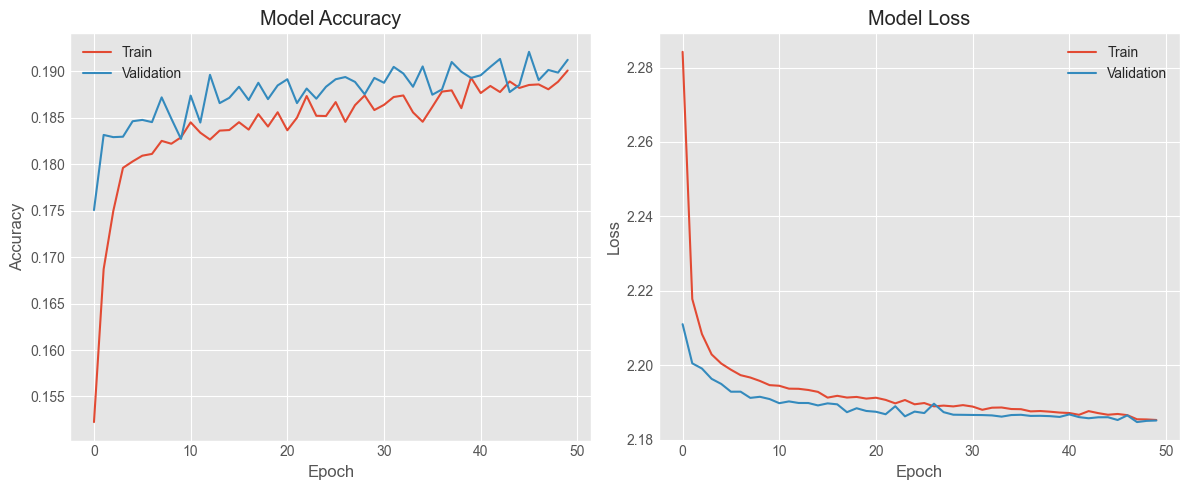

In [56]:
# Plot learning curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(final_history.history['accuracy'])
plt.plot(final_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(final_history.history['loss'])
plt.plot(final_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()

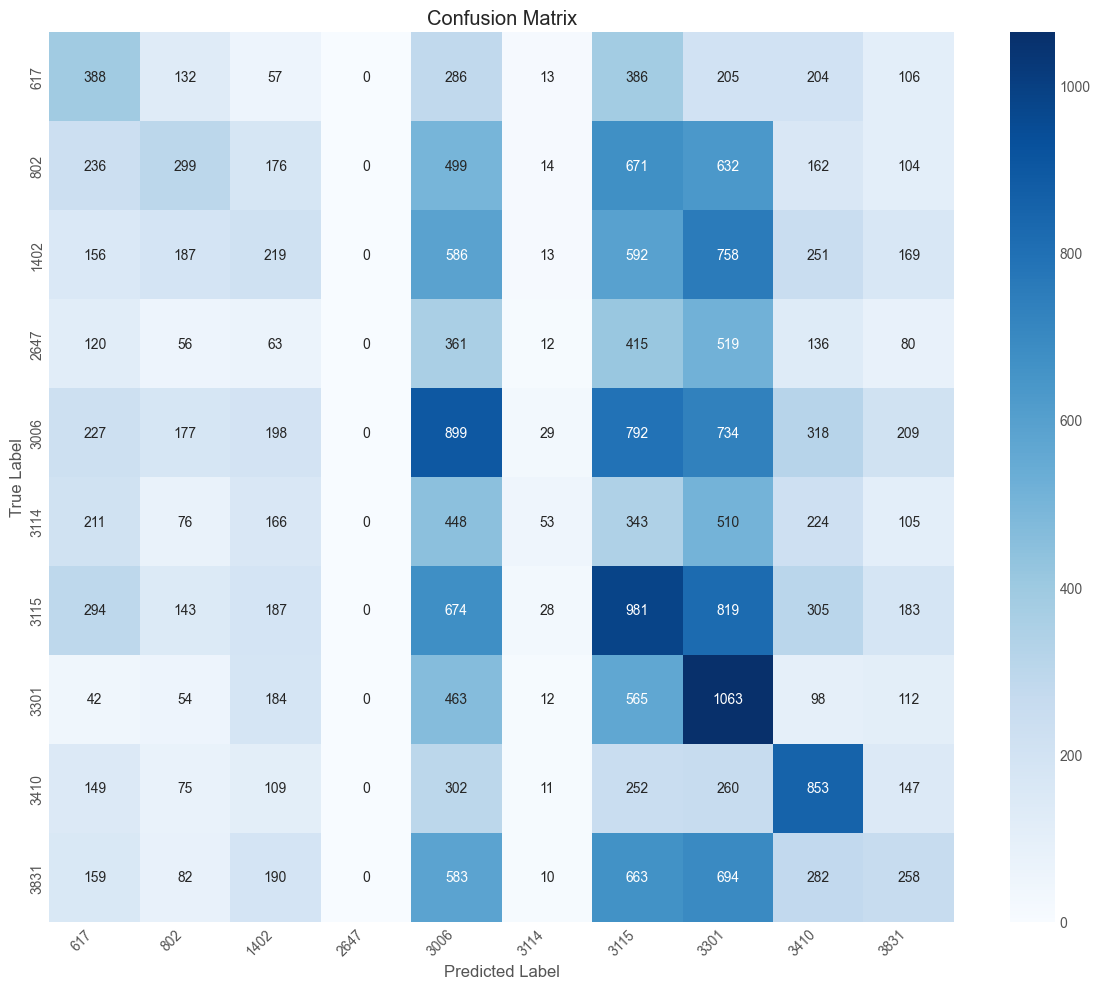

In [57]:
# Plot confusion matrix
plt.figure(figsize=(12, 10))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
           xticklabels=label_encoder.classes_, 
           yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Crime Prediction Function

In [58]:
def predict_crime_at_location(latitude, longitude, hour, month, district, model, preprocessor, label_encoder):
    """
    Predict the type of crime that might occur at a specific location and time.
    
    Parameters:
    -----------
    latitude : float
        Latitude coordinate
    longitude : float
        Longitude coordinate
    hour : int
        Hour of the day (0-23)
    month : int
        Month of the year (1-12)
    district : str
        District code
    model : Keras model
        Trained neural network model
    preprocessor : ColumnTransformer
        Fitted preprocessor
    label_encoder : LabelEncoder
        Fitted label encoder for target variable
    
    Returns:
    --------
    dict
        Dictionary containing predicted crime type and probabilities
    """
    # Create input data
    input_data = pd.DataFrame({
        'Lat': [latitude],
        'Long': [longitude],
        'HOUR': [hour],
        'MONTH': [month],
        'DISTRICT': [district]
    })
    
    # Preprocess input
    input_processed = preprocessor.transform(input_data)
    
    # Make prediction
    pred_proba = model.predict(input_processed)[0]
    pred_class = np.argmax(pred_proba)
    
    # Get top 3 predictions
    top_indices = pred_proba.argsort()[-3:][::-1]
    top_predictions = [{
        'crime_type': label_encoder.classes_[idx],
        'probability': float(pred_proba[idx])
    } for idx in top_indices]
    
    return {
        'predicted_crime': label_encoder.classes_[pred_class],
        'probability': float(pred_proba[pred_class]),
        'top_predictions': top_predictions
    }

In [59]:
# Example usage of the prediction function
print("\nExample prediction:")
example_lat = df_crime['Lat'].mean()
example_long = df_crime['Long'].mean()
example_hour = 20  # 8 PM
example_month = 7  # July
example_district = df_crime['DISTRICT'].mode()[0]

prediction = predict_crime_at_location(
    example_lat, example_long, example_hour, example_month, example_district,
    final_model, preprocessor, label_encoder
)
print(prediction)

print("\nModel implementation complete.")


Example prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
{'predicted_crime': np.int64(3301), 'probability': 0.15308471024036407, 'top_predictions': [{'crime_type': np.int64(3301), 'probability': 0.15308471024036407}, {'crime_type': np.int64(3115), 'probability': 0.1435130387544632}, {'crime_type': np.int64(3006), 'probability': 0.1263325810432434}]}

Model implementation complete.


# Modelo SVM

In [60]:
# Sample a subset of the data to make SVM training more manageable
# SVM can be computationally intensive for large datasets
sample_size = min(50000, len(df_filtered))  # Adjust this based on your computational resources
df_sample = df_filtered.sample(sample_size, random_state=42)
print(f"Sampled {sample_size} records for SVM training")

Sampled 50000 records for SVM training


In [61]:
# Features and target
X = df_sample[['Lat', 'Long', 'HOUR', 'MONTH', 'DISTRICT']]
y = df_sample['OFFENSE_CODE']

In [62]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
print(f"\nNumber of target classes: {num_classes}")
print("Target classes:", label_encoder.classes_)


Number of target classes: 10
Target classes: [ 617  802 1402 2647 3006 3114 3115 3301 3410 3831]


## Feature Engineering and Preprocessing Pipeline

In [63]:
# Define preprocessors for different column types
numeric_features = ['Lat', 'Long', 'HOUR', 'MONTH']
categorical_features = ['DISTRICT']

In [64]:
# Create preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [65]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Split data into training and testing sets

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

## SVM Model Creation and Pipeline

In [67]:
# For multiclass classification, we'll use the 'ovr' (One-vs-Rest) strategy
# We'll enable probability estimation for later prediction probabilities
svm = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)

In [68]:
# Create a pipeline that combines preprocessing and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm)
])

## Cross-Validation

In [69]:
# Define cross-validation strategy
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
start_time = time.time()
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
cv_time = time.time() - start_time

# Report cross-validation results
print("\nCross-validation results:")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print(f"Time taken: {cv_time:.2f} seconds")


Cross-validation results:
Mean accuracy: 0.1760
Standard deviation: 0.0033
Time taken: 213.64 seconds


##  Hyperparameter Tuning with Grid Search

In [70]:
print("\nPerforming hyperparameter tuning...")
start_time = time.time()


Performing hyperparameter tuning...


In [71]:
# Define parameter grid
# We're keeping it simple due to computational constraints
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto']
}

In [72]:
# Create grid search
grid_search = GridSearchCV(
    pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1
)

In [73]:
# Fit grid search
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Lat',
                                                                          'Long',
                                                                          'HOUR',
                                                                          'MONTH']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['DISTRICT'])])),
                                       ('classifier',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto']},
             scoring='accuracy', verbose=1)

In [74]:
# Report best parameters
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print(f"Time taken for grid search: {time.time() - start_time:.2f} seconds")


Best parameters: {'classifier__C': 1, 'classifier__gamma': 'scale'}
Best cross-validation score: 0.1729
Time taken for grid search: 618.29 seconds


## Final Model Training with Best Parameters

In [75]:
print("\nTraining final model with best parameters...")
start_time = time.time()
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
print(f"Training time: {time.time() - start_time:.2f} seconds")


Training final model with best parameters...
Training time: 238.87 seconds


## Model Evaluation on Test Set

In [76]:
print("\nEvaluating on test set...")
# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

# Calculate accuracy
accuracy_SVM = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy_SVM:.4f}")


Evaluating on test set...
Test accuracy: 0.1762


In [78]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.36      0.22       686
           1       0.21      0.07      0.11      1090
           2       0.16      0.07      0.09      1100
           3       0.07      0.01      0.02       668
           4       0.21      0.08      0.12      1351
           5       0.14      0.14      0.14       802
           6       0.21      0.05      0.08      1377
           7       0.15      0.60      0.25       989
           8       0.25      0.49      0.33       815
           9       0.17      0.06      0.09      1122

    accuracy                           0.18     10000
   macro avg       0.17      0.19      0.14     10000
weighted avg       0.18      0.18      0.14     10000




Creating visualizations...


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, '617'),
  Text(1.5, 0, '802'),
  Text(2.5, 0, '1402'),
  Text(3.5, 0, '2647'),
  Text(4.5, 0, '3006'),
  Text(5.5, 0, '3114'),
  Text(6.5, 0, '3115'),
  Text(7.5, 0, '3301'),
  Text(8.5, 0, '3410'),
  Text(9.5, 0, '3831')])

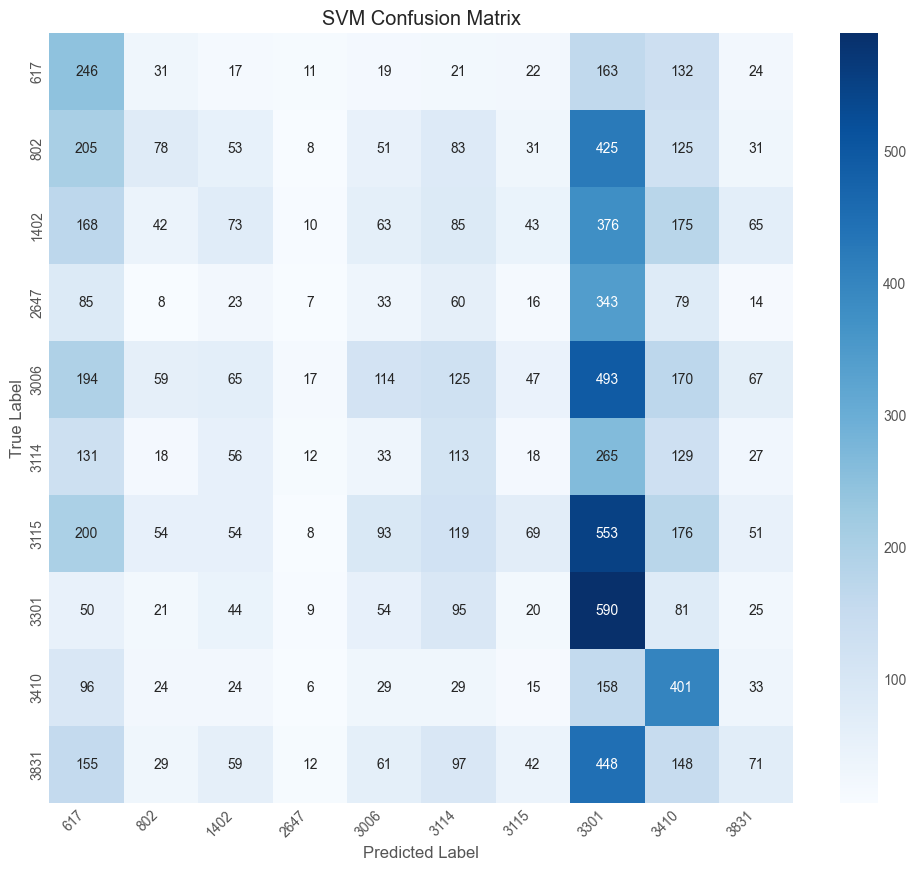

In [79]:
print("\nCreating visualizations...")

# Plot confusion matrix
plt.figure(figsize=(12, 10))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
           xticklabels=label_encoder.classes_, 
           yticklabels=label_encoder.classes_)
plt.title('SVM Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')

## Crime Prediction Function

In [80]:
def predict_crime_at_location(latitude, longitude, hour, month, district, model, label_encoder):
    """
    Predict the type of crime that might occur at a specific location and time using SVM.
    
    Parameters:
    -----------
    latitude : float
        Latitude coordinate
    longitude : float
        Longitude coordinate
    hour : int
        Hour of the day (0-23)
    month : int
        Month of the year (1-12)
    district : str
        District code
    model : Trained SVM pipeline
    label_encoder : LabelEncoder
        Fitted label encoder for target variable
    
    Returns:
    --------
    dict
        Dictionary containing predicted crime type and probabilities
    """
    # Create input data
    input_data = pd.DataFrame({
        'Lat': [latitude],
        'Long': [longitude],
        'HOUR': [hour],
        'MONTH': [month],
        'DISTRICT': [district]
    })
    
    # Predict class and probability
    pred_class = model.predict(input_data)[0]
    pred_proba = model.predict_proba(input_data)[0]
    
    # Get top 3 predictions
    top_indices = pred_proba.argsort()[-3:][::-1]
    top_predictions = [{
        'crime_type': label_encoder.classes_[idx],
        'probability': float(pred_proba[idx])
    } for idx in top_indices]
    
    return {
        'predicted_crime': label_encoder.classes_[pred_class],
        'probability': float(pred_proba[pred_class]),
        'top_predictions': top_predictions
    }

In [81]:
#Example usage of the prediction function
print("\nExample prediction:")
example_lat = df_crime['Lat'].mean()
example_long = df_crime['Long'].mean()
example_hour = 20  # 8 PM
example_month = 7  # July
example_district = df_crime['DISTRICT'].mode()[0]

prediction = predict_crime_at_location(
    example_lat, example_long, example_hour, example_month, example_district,
    best_model, label_encoder
)
print(prediction)


Example prediction:
{'predicted_crime': np.int64(3301), 'probability': 0.16216383282638827, 'top_predictions': [{'crime_type': np.int64(3301), 'probability': 0.16216383282638827}, {'crime_type': np.int64(3115), 'probability': 0.13199223753799508}, {'crime_type': np.int64(3831), 'probability': 0.12563896278614992}]}


# Comparación de Accuracy entre los dos modelos

In [82]:
def graph_compare_results(model_names, accuracies):
    # implementa un gráfico de barras con el eje x como los nombres de los modelos y el eje y como la exactitud, con lineas punteadas horizontales donde una exactitud <60% Bajo, entre 60% y 70% Medio y >70% Alto, cada barra tiene un porcentaje
    plt.figure(figsize=(10, 6))
    sns.barplot(x=model_names, y=accuracies, palette='viridis')
    plt.ylim(0, 1)
    plt.axhline(y=0.6, color='red', linestyle='--', label='Bajo (<60%)')
    plt.axhline(y=0.7, color='orange', linestyle='--', label='Medio (60%-70%)')
    plt.axhline(y=0.8, color='green', linestyle='--', label='Alto (>80%)')
    plt.title('Comparación de Accuracy de Modelos de Clasificación')
    plt.ylabel('Accuracy')
    plt.xlabel('Modelo')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

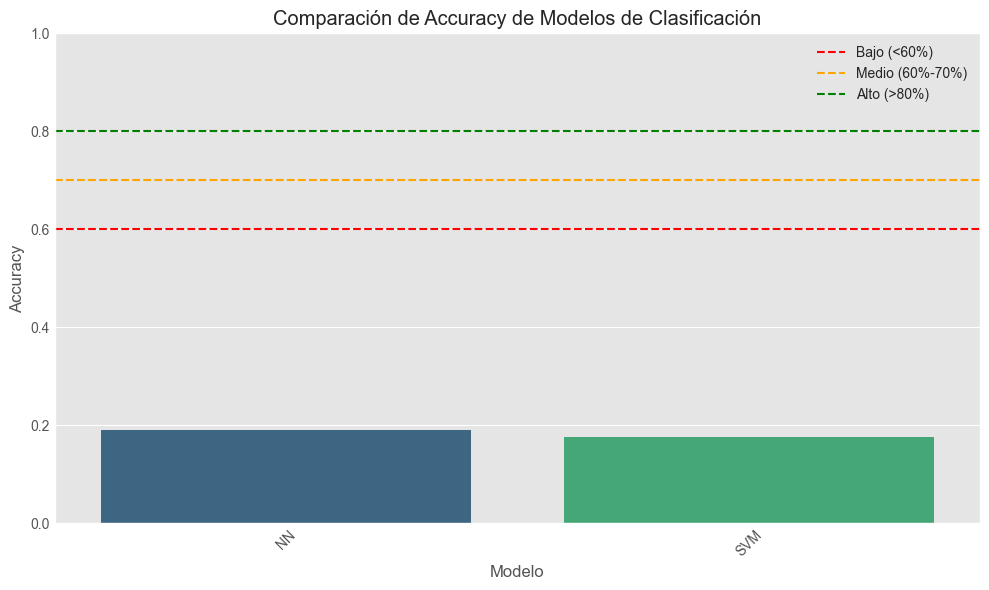

In [83]:
graph_compare_results(
    ['NN', 'SVM'],
    [accuracy_RN, accuracy_SVM]
)